In [43]:
import os
import warnings

import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None

## Анализ игроков рынка

In [44]:
shops = pd.read_excel("C:\\Users\\HOME\\PycharmProjects\\DA_ConstructionMarketplaces\\data_pivot.xlsx", sheet_name='data_scraped')
shops.head()

,name,region,website,address,phone
0,Petrovich,Санкт-Петербург,petrovich.ru,"Индустриальный пр., 73, Санкт-Петербург, Русиј...",+7 812 334-88-88
1,Stroitel',Санкт-Петербург,ststroitel.ru,"пр. Юрия Гагарина, 34 корпус 2, лит. А, Санкт-...",+7 812 364-72-15
2,Stroymarket Saturn,Санкт-Петербург,saturn.net,"Литовская ул., 15, Санкт-Петербург, Русија, 19...",+7 800 100-21-12
3,Stroymag,Санкт-Петербург,stroymag-v-centre-spb.ru,"Литейный пр., 46, Санкт-Петербург, Русија, 191014",+7 911 025-30-08
4,Magazin Stroitel',Санкт-Петербург,ststroitel.ru,"два торговых зала с отдельными входами, Заневс...",+7 812 242-81-59


In [45]:
num_shops = shops.groupby(['website', 'region']).count()['name'].rename('num_shops').reset_index()
top_brands = num_shops.sort_values('num_shops', ascending=False).head(16)
top = top_brands[['website', 'region', 'num_shops']]
top

,website,region,num_shops
294,vk.com,Архангельская область,22
298,vk.com,Мурманская область,21
295,vk.com,Вологодская область,15
301,vk.com,Псковская область,15
303,vk.com,Республика Коми,14
302,vk.com,Республика Карелия,12
239,stroistudiya.ru,Мурманская область,11
162,optimal-r.ru,Мурманская область,9
188,ptz-stroy.ru,Республика Карелия,9
158,novgorod.stroylandiya.ru,Новгородская область,9


In [46]:
top_bez_vk = top[top['website'] != 'vk.com']
top_bez_vk.to_csv("C:\\Users\\HOME\Documents\\data_science\\Profpoint\\top_be_vk.csv", index=False, encoding='utf-8-sig')

In [47]:
top_names = pd.merge(top_bez_vk, shops[['website', 'name']], on='website', how='left')
top_names_grouped = top_names.groupby(['website', 'region', 'num_shops'])['name'].agg(list).reset_index()
top_names_grouped

,website,region,num_shops,name
0,arhimedmarket.ru,Санкт-Петербург,8,"[Arkhimed, Stroymarket, Arkhimed, Stroyplyus S..."
1,c-s-k.ru,Республика Карелия,7,"[Construction hypermarket ""CSK"", Stroymaterial..."
2,mega29.ru,Республика Коми,8,"[Mega, Yeliseyevskiy, Stroytim, Stroitel' Baza..."
3,novgorod.stroylandiya.ru,Новгородская область,9,"[Stroylandiya, Vybor, Ooo ""Tpk Mia"", Magazin S..."
4,optimal-r.ru,Мурманская область,9,"[Optimal Solutions, Mega Stroy, Korpus 1, Komp..."
5,orbita-stroy.pskov.ru,Псковская область,8,"[Shop Building Materials, Novostroy Magazin St..."
6,ptz-stroy.ru,Республика Карелия,9,"[Stroitel'nyy Dvor, Magazin Universalstroy, U ..."
7,stroistudiya.ru,Мурманская область,11,"[Stroy Studiya, plumbing Supplies, Akvaarktika..."
8,tbm.ru,Республика Коми,8,"[Tbm, Ekopol, Irina Magazin, Khozyain, Magazin..."
9,tiberg.ru,Вологодская область,8,"[Tiberg, МЕТРИКА № 62, Stroymaster, Stroitel'n..."


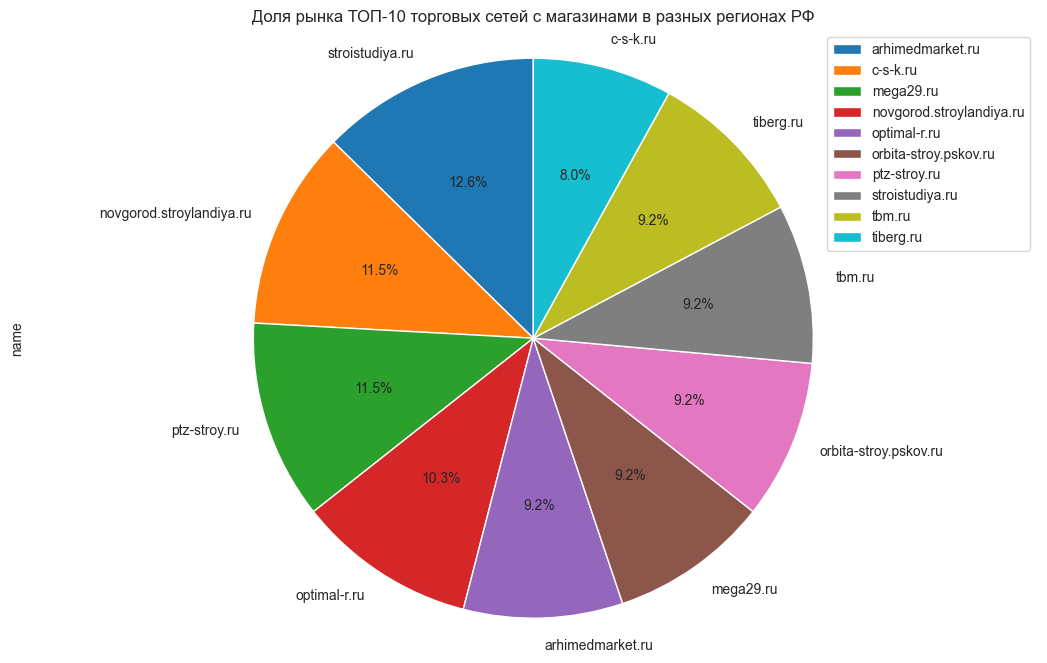

In [48]:
name_counts = top_names_grouped.groupby('website')['name'].apply(lambda x: len(set(y for z in x for y in z)))

# create a pie chart with the market share of the top websites
plt.figure(figsize=(13, 8))
name_counts.sort_values(ascending=False).plot.pie(autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Доля рынка ТОП-10 торговых сетей с магазинами в разных регионах РФ')
plt.legend(name_counts.index, loc='best')
plt.savefig(r'C:\Users\HOME\Documents\data_science\Profpoint\plots\top_10.jpg', bbox_inches='tight')
plt.show();

In [49]:
shops.columns

Index(['name', 'region', 'website', 'address', 'phone'], dtype='object')

In [50]:
shops.groupby('region')['name'].nunique().sort_values(ascending=False)

region
Санкт-Петербург              102
Псковская область             99
Калининградская область       98
Республика Карелия            95
Архангельская область         92
Республика Коми               91
Мурманская область            83
Новгородская область          75
Ленинградская область         71
Вологодская область           70
Ненецкий автономный округ      4
Name: name, dtype: int64

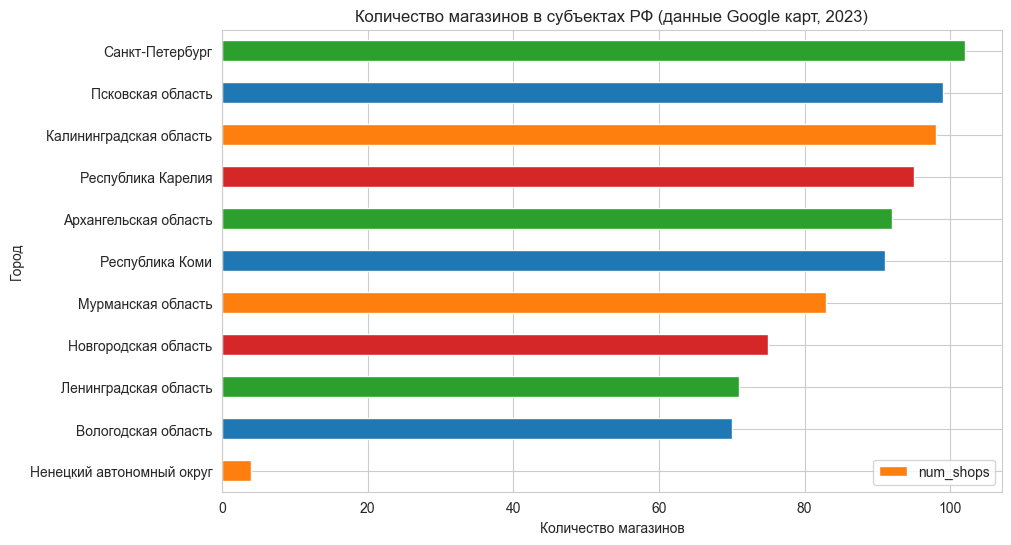

In [51]:
# сгруппировать данные по региону и вычислить количество магазинов в каждом регионе
shops_by_region = shops.groupby('region')['name'].nunique().reset_index()

# переименовать столбцы
shops_by_region.columns = ['region', 'num_shops']

# отсортировать данные по убыванию количества магазинов
shops_by_region = shops_by_region.sort_values('num_shops', ascending=True)

# создать горизонтальную столбчатую диаграмму с разными цветами для каждого столбца
fig, ax = plt.subplots(figsize=(13, 6))
shops_by_region.plot(kind='barh', x='region', y='num_shops', color=['#FF7F0E', '#1F77B4', '#2CA02C', '#D62728'], ax=ax)

# установить метки осей и заголовок
ax.set_xlabel('Количество магазинов')
ax.set_ylabel('Город')
ax.set_title('Количество магазинов в субъектах РФ (данные Google карт, 2023)')

# настроить поля, чтобы не обрезать названия городов
plt.subplots_adjust(left=0.3)

# сохранить диаграмму в файл
plt.savefig(r'C:\Users\HOME\Documents\data_science\Profpoint\plots\shops_per_city.jpg', bbox_inches='tight')

plt.show();

In [63]:
shops_by_region.to_csv("C:\\Users\\HOME\\PycharmProjects\\DA_ConstructionMarketplaces\\processed_data\\shops_by_region.csv", index=False, encoding='utf-8-sig')

In [53]:
shops_by_region = shops['region'].value_counts()

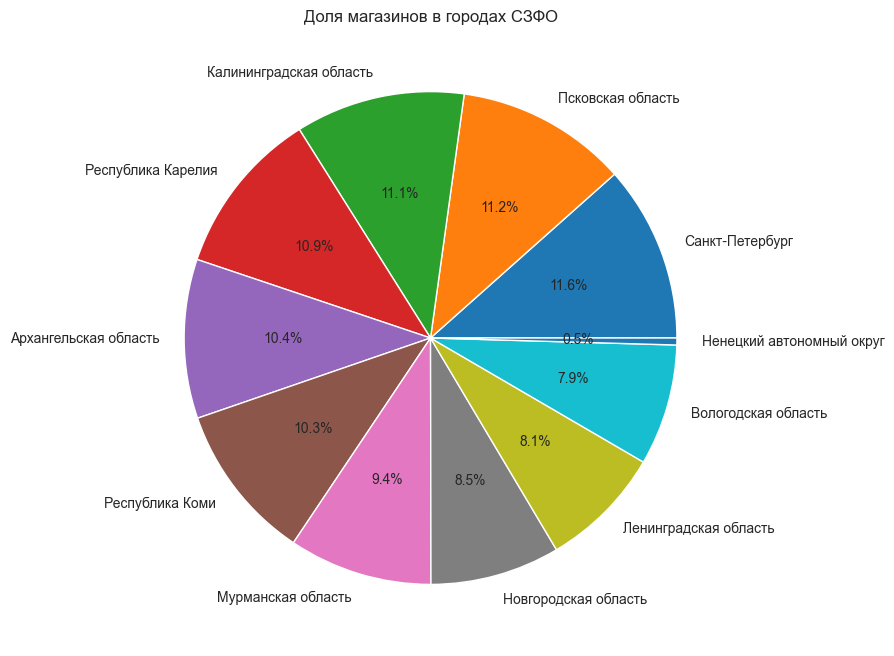

In [54]:
# Строим круговую диаграмму
fig, ax = plt.subplots(figsize=(16, 8))
plt.pie(shops_by_region, labels=shops_by_region.index, autopct='%1.1f%%')
plt.title('Доля магазинов в городах СЗФО')
plt.savefig(r'C:\Users\HOME\Documents\data_science\Profpoint\plots\shops_per_city_round.jpg', bbox_inches='tight')
plt.show();

Для определения ключевых игроков на рынке можно использовать такие метрики, как доля рынка, количество магазинов, оборот. Также можно провести анализ конкурентов и оценить их стратегии и рыночное положение. Для этого нужно собрать дополнительную информацию о каждом магазине и провести анализ данных.

Пример кода для определения ключевых игроков:

In [55]:
shops_by_region = shops.groupby('region')['name'].count().reset_index()

# переименовать столбец 'name' в 'num_shops'
shops_by_region = shops_by_region.rename(columns={'name': 'num_shops'})

# отсортировать данные по убыванию количества магазинов
shops_by_region = shops_by_region.sort_values('num_shops', ascending=False)
# вывести результат
print(shops_by_region)

                       region  num_shops
10            Санкт-Петербург        102
7           Псковская область         99
2     Калининградская область         98
8          Республика Карелия         95
0       Архангельская область         92
9             Республика Коми         91
4          Мурманская область         83
6        Новгородская область         75
3       Ленинградская область         71
1         Вологодская область         70
5   Ненецкий автономный округ          4


### Индексы цен производителей на строительную продукцию_2017_2022

In [64]:
index_prod_prices_2017_2022 = pd.read_excel("C:\\Users\\HOME\\PycharmProjects\\DA_ConstructionMarketplaces\\processed_data\\inde_prod_prices_2017_2022.xls", sheet_name='data')
index_prod_prices_2017_2022

,region,prod_type,2017,2018,2019,2020,2021,2022
0,Северо-Западный федеральный округ,"Растениеводство и животноводство, охота и ...",99.23,99.91,101.18,100.17,100.11,100.59
1,Северо-Западный федеральный округ,Выращивание однолетних культур,NaN,NaN,101.18,99.91,100.07,100.47
2,Северо-Западный федеральный округ,Выращивание рассады,NaN,NaN,101.18,99.90,NaN,NaN
3,Северо-Западный федеральный округ,Животноводство,99.23,99.91,101.18,100.17,100.11,100.59
4,Северо-Западный федеральный округ,Смешанное сельское хозяйство,99.23,99.91,101.18,100.29,99.94,100.53
...,...,...,...,...,...,...,...,...
2416,Санкт-Петербург,"Деятельность библиотек, архивов, музеев и ...",99.85,100.16,100.63,99.67,100.80,100.74
2417,Санкт-Петербург,Деятельность по предоставлению прочих перс...,100.22,100.37,100.75,99.60,100.88,100.65
2418,Санкт-Петербург,Деятельность ветеринарная,99.99,100.18,100.86,99.75,100.88,100.71
2419,Санкт-Петербург,"Производство прочих транспортных средств, не в...",NaN,99.32,100.82,99.69,100.40,100.64


In [ ]:
index_prod_prices_2017_2022.columns

In [ ]:
index_prod_prices_2017_2022['region'].unique()

In [ ]:

# группируем по региону и заполняем пропущенные значения средним значением в каждой группе
index_prod_prices_2017_2022_gr = index_prod_prices_2017_2022.groupby(['region', 'prod_type']).apply(lambda group: group.fillna(group.mean()))

# выводим результат
index_prod_prices_2017_2022_gr

In [ ]:
index_prod_prices_2017_2022_gr['region'].unique()

In [65]:
index_prod_prices_2017_2022_aggr = pd.read_excel("C:\\Users\\HOME\\PycharmProjects\\DA_ConstructionMarketplaces\\processed_data\\inde_prod_prices_2017_2022.xls", sheet_name='aggr')
index_prod_prices_2017_2022_aggr

,region,prod_type,2017,2018,2019,2020,2021,2022
0,Северо-Западный федеральный округ,"СЕЛЬСКОЕ, ЛЕСНОЕ ХОЗЯЙСТВО, ОХОТА, РЫБОЛОВСТВО...",99.01,99.98,101.14,100.22,100.12,100.61
1,Северо-Западный федеральный округ,ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,98.85,99.98,101.26,100.18,100.18,100.76
2,Северо-Западный федеральный округ,ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,99.61,99.43,100.91,100.15,100.29,100.61
3,Северо-Западный федеральный округ,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПА...",99.28,99.86,101.27,100.29,100.18,100.70
4,Северо-Западный федеральный округ,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОР...",98.83,100.03,101.30,100.15,99.95,100.60
...,...,...,...,...,...,...,...,...
221,Санкт-Петербург,ГОСУДАРСТВЕННОЕ УПРАВЛЕНИЕ И ОБЕСПЕЧЕНИЕ ВОЕНН...,100.31,100.31,100.67,99.70,100.75,100.70
222,Санкт-Петербург,ОБРАЗОВАНИЕ,100.26,99.70,100.53,99.77,100.24,100.75
223,Санкт-Петербург,ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ЗДРАВООХРАНЕНИЯ И СОЦИА...,99.99,100.18,100.86,99.75,100.88,100.72
224,Санкт-Петербург,"ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ КУЛЬТУРЫ, СПОРТА, ОРГАН...",99.85,100.16,100.62,99.67,100.80,100.73


In [66]:
# Создаем копию таблицы без первой колонки
prod_index_aggr_reg = index_prod_prices_2017_2022_aggr.drop(index_prod_prices_2017_2022_aggr.columns[1], axis=1).copy()
prod_index_aggr_reg.to_csv("C:\\Users\\HOME\\PycharmProjects\\DA_ConstructionMarketplaces\\processed_data\\prod_index_aggr_reg.csv", index=False, encoding='utf-8-sig')

In [67]:
# Создаем копию таблицы без первой колонки
prod_index_aggr = index_prod_prices_2017_2022_aggr.drop(index_prod_prices_2017_2022_aggr.columns[0], axis=1).copy()
prod_index_aggr

,prod_type,2017,2018,2019,2020,2021,2022
0,"СЕЛЬСКОЕ, ЛЕСНОЕ ХОЗЯЙСТВО, ОХОТА, РЫБОЛОВСТВО...",99.01,99.98,101.14,100.22,100.12,100.61
1,ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,98.85,99.98,101.26,100.18,100.18,100.76
2,ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,99.61,99.43,100.91,100.15,100.29,100.61
3,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПА...",99.28,99.86,101.27,100.29,100.18,100.70
4,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОР...",98.83,100.03,101.30,100.15,99.95,100.60
...,...,...,...,...,...,...,...
221,ГОСУДАРСТВЕННОЕ УПРАВЛЕНИЕ И ОБЕСПЕЧЕНИЕ ВОЕНН...,100.31,100.31,100.67,99.70,100.75,100.70
222,ОБРАЗОВАНИЕ,100.26,99.70,100.53,99.77,100.24,100.75
223,ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ЗДРАВООХРАНЕНИЯ И СОЦИА...,99.99,100.18,100.86,99.75,100.88,100.72
224,"ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ КУЛЬТУРЫ, СПОРТА, ОРГАН...",99.85,100.16,100.62,99.67,100.80,100.73


In [68]:
prod_index_aggr['prod_type'].unique()

array(['СЕЛЬСКОЕ, ЛЕСНОЕ ХОЗЯЙСТВО, ОХОТА, РЫБОЛОВСТВО И РЫБОВОДСТВО',
       'ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ', 'ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА',
       'ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА',
       'ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ',
       'СТРОИТЕЛЬСТВО',
       'ТОРГОВЛЯ ОПТОВАЯ И РОЗНИЧНАЯ; РЕМОНТ АВТОТРАНСПОРТНЫХ СРЕДСТВ И МОТОЦИКЛОВ',
       'ТРАНСПОРТИРОВКА И ХРАНЕНИЕ',
       'ДЕЯТЕЛЬНОСТЬ ГОСТИНИЦ И ПРЕДПРИЯТИЙ ОБЩЕСТВЕННОГО ПИТАНИЯ',
       'ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ИНФОРМАЦИИ И СВЯЗИ',
       'ДЕЯТЕЛЬНОСТЬ ФИНАНСОВАЯ И СТРАХОВАЯ',
       'ДЕЯТЕЛЬНОСТЬ ПО ОПЕРАЦИЯМ С НЕДВИЖИМЫМ ИМУЩЕСТВОМ',
       'ДЕЯТЕЛЬНОСТЬ ПРОФЕССИОНАЛЬНАЯ, НАУЧНАЯ И ТЕХНИЧЕСКАЯ',
       'ДЕЯТЕЛЬНОСТЬ АДМИНИСТРАТИВНАЯ И СОПУТСТВУЮЩИЕ ДОПОЛНИТЕЛЬНЫЕ УСЛУГИ',
       'ГОСУДАРСТВЕННОЕ УПРАВЛЕНИЕ И ОБЕСПЕЧЕНИЕ ВОЕННОЙ БЕЗОПАСНОСТИ; СОЦИАЛЬНОЕ ОБЕСПЕЧЕНИЕ',
       'ОБРАЗОВАНИЕ',
       'ДЕЯТЕЛЬНОСТЬ В О

In [69]:
prod_index_aggr.columns

Index(['prod_type', 2017, 2018, 2019, 2020, 2021, 2022], dtype='object')

In [70]:
prod_index_aggr['prod_type'].unique()

array(['СЕЛЬСКОЕ, ЛЕСНОЕ ХОЗЯЙСТВО, ОХОТА, РЫБОЛОВСТВО И РЫБОВОДСТВО',
       'ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ', 'ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА',
       'ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА',
       'ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ',
       'СТРОИТЕЛЬСТВО',
       'ТОРГОВЛЯ ОПТОВАЯ И РОЗНИЧНАЯ; РЕМОНТ АВТОТРАНСПОРТНЫХ СРЕДСТВ И МОТОЦИКЛОВ',
       'ТРАНСПОРТИРОВКА И ХРАНЕНИЕ',
       'ДЕЯТЕЛЬНОСТЬ ГОСТИНИЦ И ПРЕДПРИЯТИЙ ОБЩЕСТВЕННОГО ПИТАНИЯ',
       'ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ИНФОРМАЦИИ И СВЯЗИ',
       'ДЕЯТЕЛЬНОСТЬ ФИНАНСОВАЯ И СТРАХОВАЯ',
       'ДЕЯТЕЛЬНОСТЬ ПО ОПЕРАЦИЯМ С НЕДВИЖИМЫМ ИМУЩЕСТВОМ',
       'ДЕЯТЕЛЬНОСТЬ ПРОФЕССИОНАЛЬНАЯ, НАУЧНАЯ И ТЕХНИЧЕСКАЯ',
       'ДЕЯТЕЛЬНОСТЬ АДМИНИСТРАТИВНАЯ И СОПУТСТВУЮЩИЕ ДОПОЛНИТЕЛЬНЫЕ УСЛУГИ',
       'ГОСУДАРСТВЕННОЕ УПРАВЛЕНИЕ И ОБЕСПЕЧЕНИЕ ВОЕННОЙ БЕЗОПАСНОСТИ; СОЦИАЛЬНОЕ ОБЕСПЕЧЕНИЕ',
       'ОБРАЗОВАНИЕ',
       'ДЕЯТЕЛЬНОСТЬ В О

In [71]:
# группируем по региону и заполняем пропущенные значения средним значением в каждой группе
prod_index_aggr_gr = prod_index_aggr.groupby(['prod_type']).apply(lambda group: group.fillna(group.mean()))

# выводим результат
prod_index_aggr_gr

,prod_type,2017,2018,2019,2020,2021,2022
0,"СЕЛЬСКОЕ, ЛЕСНОЕ ХОЗЯЙСТВО, ОХОТА, РЫБОЛОВСТВО...",99.01,99.98,101.14,100.22,100.12,100.61
1,ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,98.85,99.98,101.26,100.18,100.18,100.76
2,ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,99.61,99.43,100.91,100.15,100.29,100.61
3,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПА...",99.28,99.86,101.27,100.29,100.18,100.70
4,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОР...",98.83,100.03,101.30,100.15,99.95,100.60
...,...,...,...,...,...,...,...
221,ГОСУДАРСТВЕННОЕ УПРАВЛЕНИЕ И ОБЕСПЕЧЕНИЕ ВОЕНН...,100.31,100.31,100.67,99.70,100.75,100.70
222,ОБРАЗОВАНИЕ,100.26,99.70,100.53,99.77,100.24,100.75
223,ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ЗДРАВООХРАНЕНИЯ И СОЦИА...,99.99,100.18,100.86,99.75,100.88,100.72
224,"ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ КУЛЬТУРЫ, СПОРТА, ОРГАН...",99.85,100.16,100.62,99.67,100.80,100.73


In [72]:
# Фильтруем данные для нужного вида продукции
prod_types = ['ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ',
             'СЕЛЬСКОЕ, ЛЕСНОЕ ХОЗЯЙСТВО, ОХОТА, РЫБОЛОВСТВО И РЫБОВОДСТВО',
             'ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА',
             'ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА',
             'ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ',
             'СТРОИТЕЛЬСТВО',
             'ТОРГОВЛЯ ОПТОВАЯ И РОЗНИЧНАЯ; РЕМОНТ АВТОТРАНСПОРТНЫХ СРЕДСТВ И МОТОЦИКЛОВ',
             'ТРАНСПОРТИРОВКА И ХРАНЕНИЕ',
             'ДЕЯТЕЛЬНОСТЬ ГОСТИНИЦ И ПРЕДПРИЯТИЙ ОБЩЕСТВЕННОГО ПИТАНИЯ',
             'ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ИНФОРМАЦИИ И СВЯЗИ',
             'ДЕЯТЕЛЬНОСТЬ ФИНАНСОВАЯ И СТРАХОВАЯ',
             'ДЕЯТЕЛЬНОСТЬ ПО ОПЕРАЦИЯМ С НЕДВИЖИМЫМ ИМУЩЕСТВОМ',
             'ДЕЯТЕЛЬНОСТЬ ПРОФЕССИОНАЛЬНАЯ, НАУЧНАЯ И ТЕХНИЧЕСКАЯ',
             'ДЕЯТЕЛЬНОСТЬ АДМИНИСТРАТИВНАЯ И СОПУТСТВУЮЩИЕ ДОПОЛНИТЕЛЬНЫЕ УСЛУГИ',
             'ГОСУДАРСТВЕННОЕ УПРАВЛЕНИЕ И ОБЕСПЕЧЕНИЕ ВОЕННОЙ БЕЗОПАСНОСТИ; СОЦИАЛЬНОЕ ОБЕСПЕЧЕНИЕ',
             'ОБРАЗОВАНИЕ',
             'ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ЗДРАВООХРАНЕНИЯ И СОЦИАЛЬНЫХ УСЛУГ',
             'ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ КУЛЬТУРЫ, СПОРТА, ОРГАНИЗАЦИИ ДОСУГА И РАЗВЛЕЧЕНИЙ',
             'ПРЕДОСТАВЛЕНИЕ ПРОЧИХ ВИДОВ УСЛУГ'
             ]

# for prod_type in prod_types:
#     data = prod_index_aggr_gr[prod_index_aggr_gr['prod_type'] == prod_type][[2017, 2018, 2019, 2020, 2021, 2022]]
#     # Создаем линейную диаграмму
#     sns.lineplot(x=data.columns, y=data.values[0], color='b')
#     plt.title('Индексы цен производителей на строительную продукцию в СЗФО (2017-2022)\n' + prod_type)
#     plt.xlabel('Год')
#     # Save the figure to file
#     plt.savefig(r'C:\Users\HOME\Documents\data_science\Profpoint\shops_per_city.jpg', bbox_inches='tight')
#     plt.show();

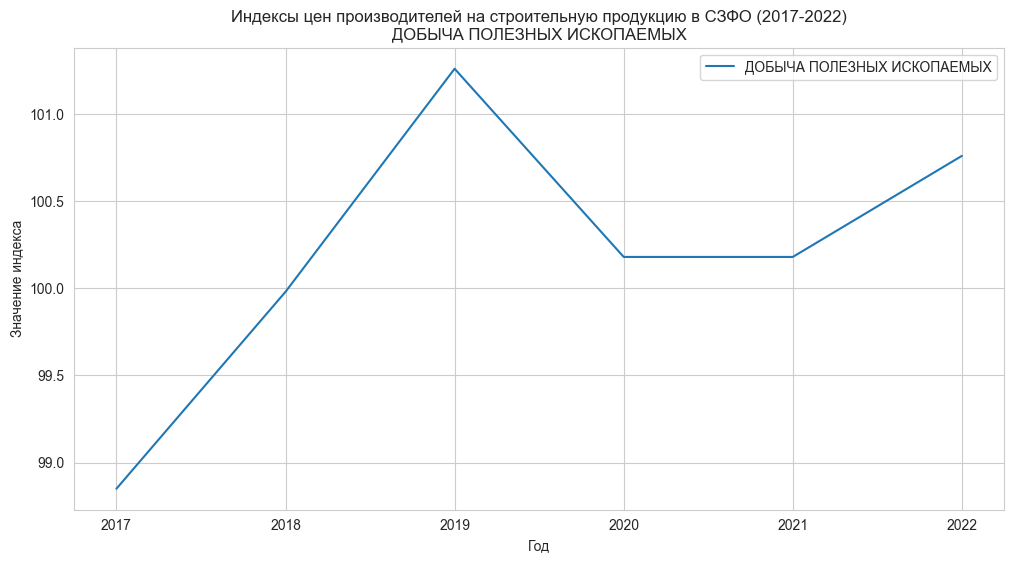

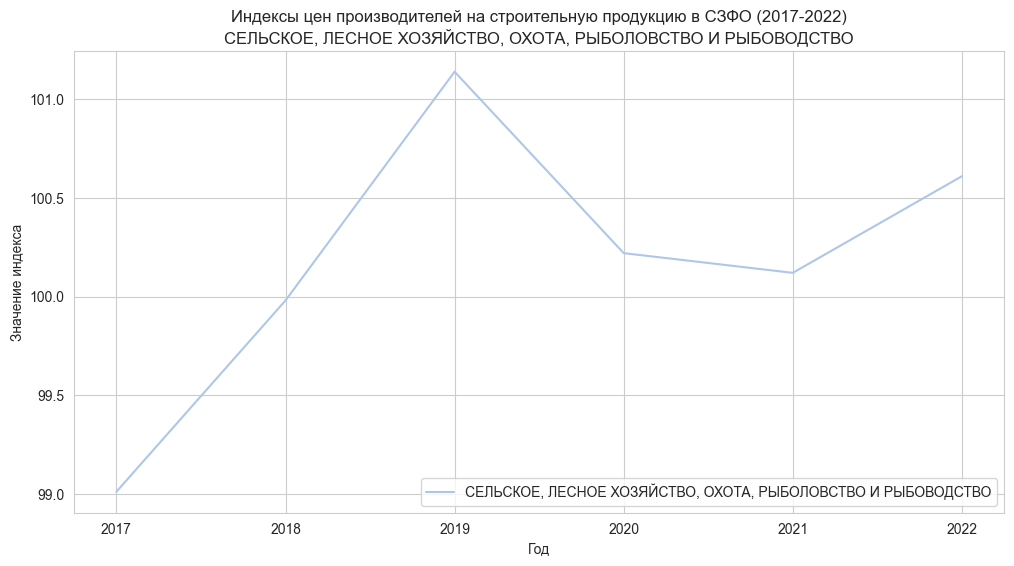

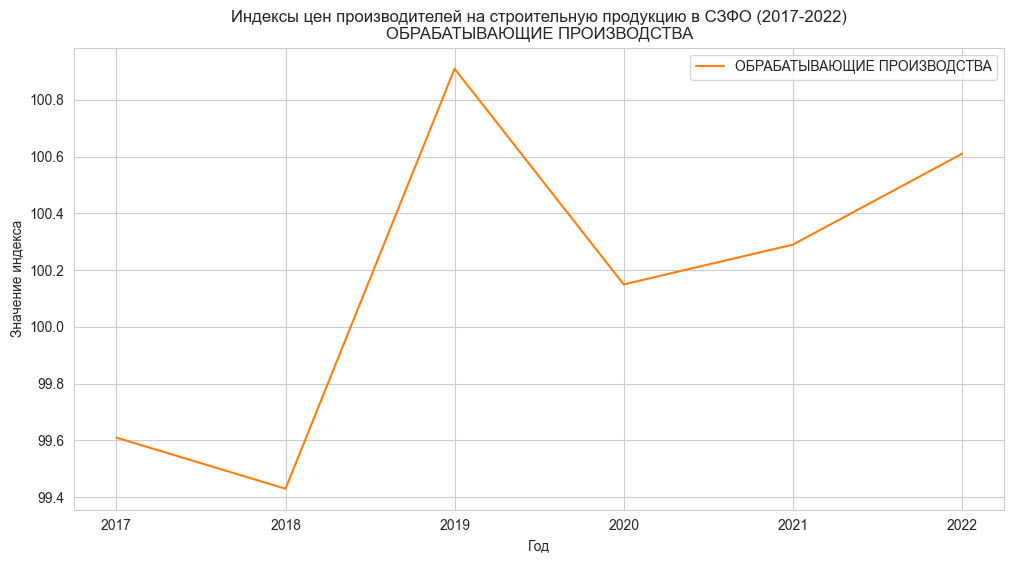

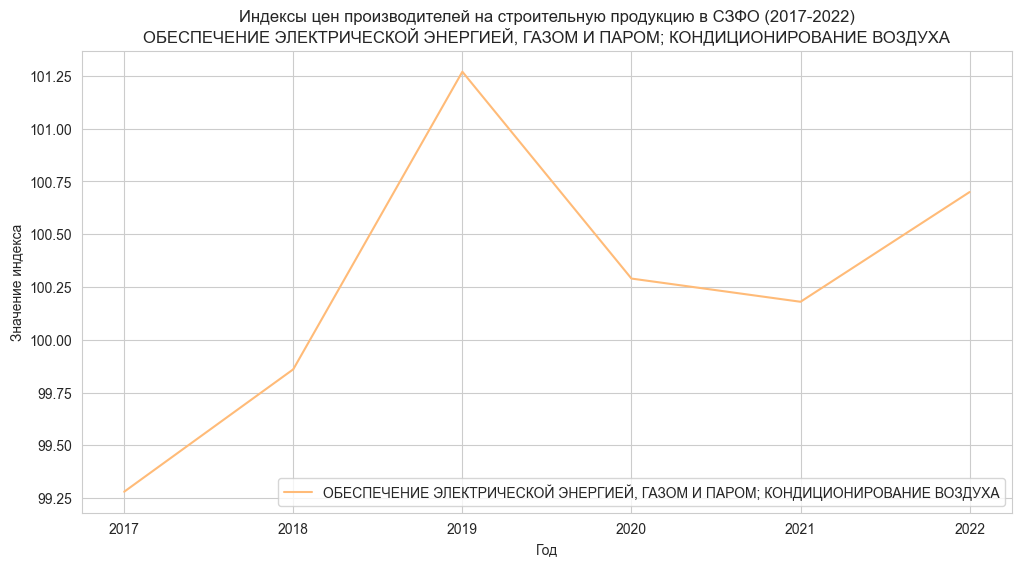

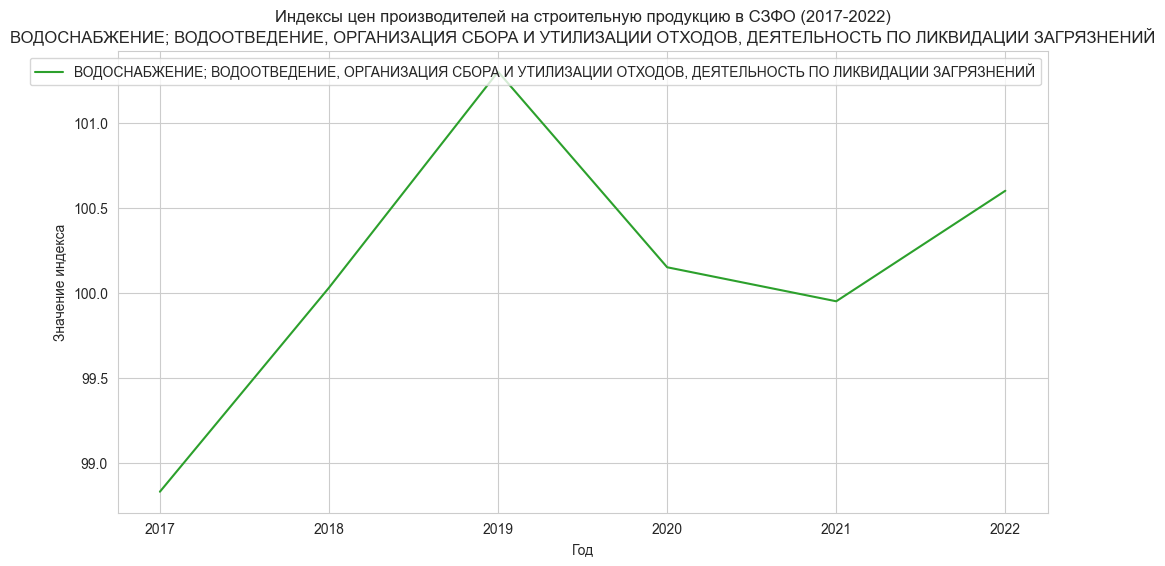

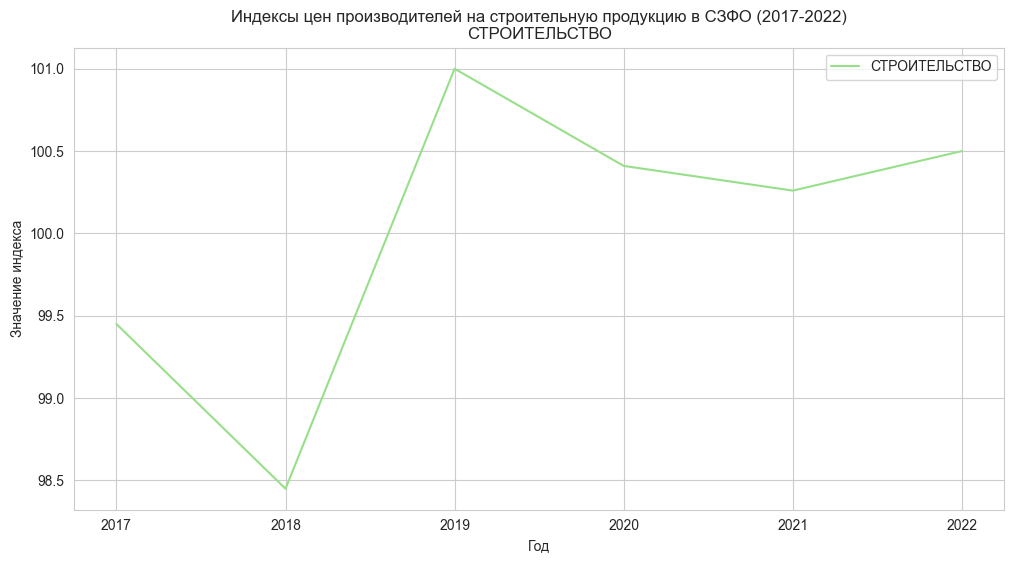

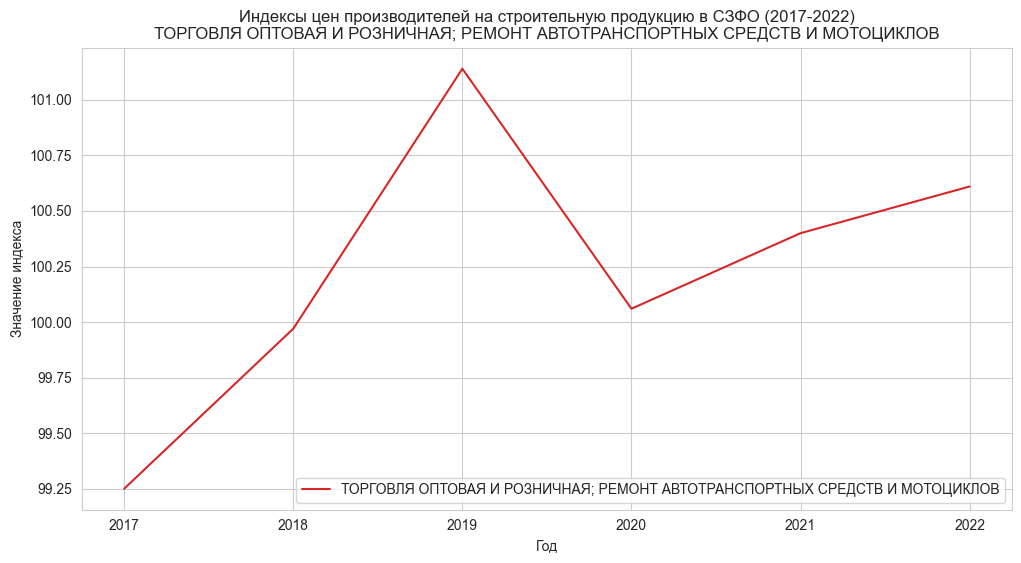

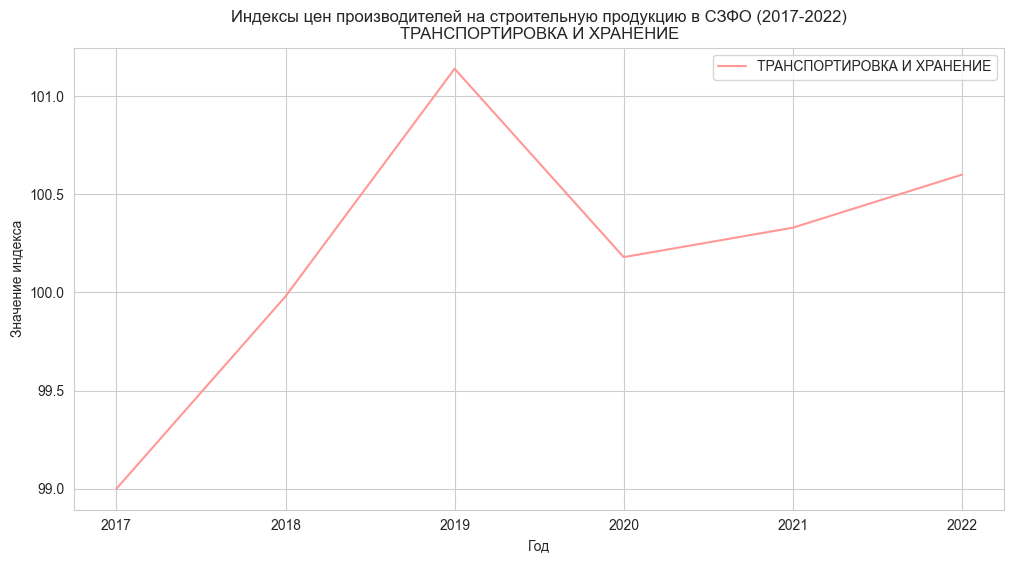

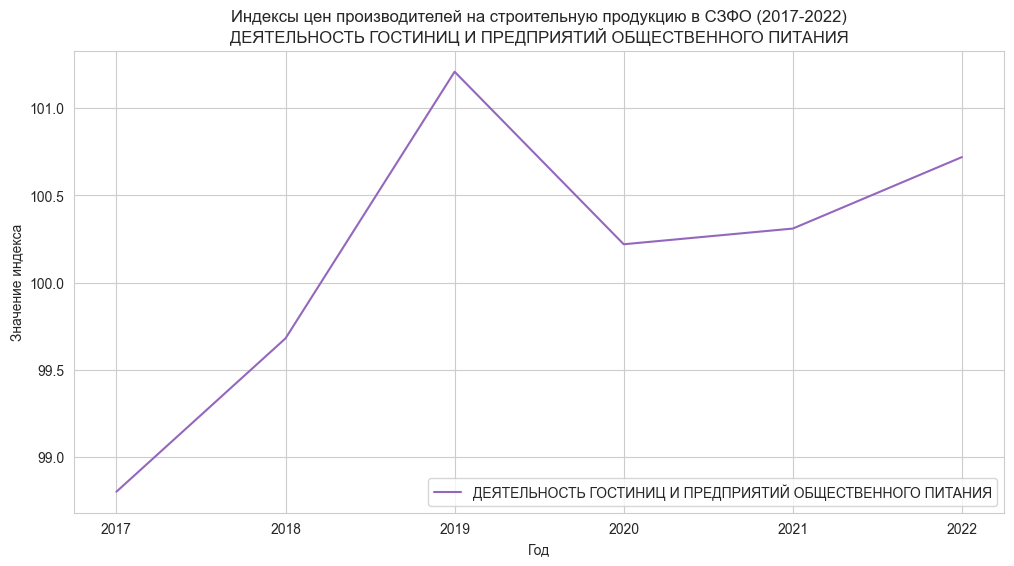

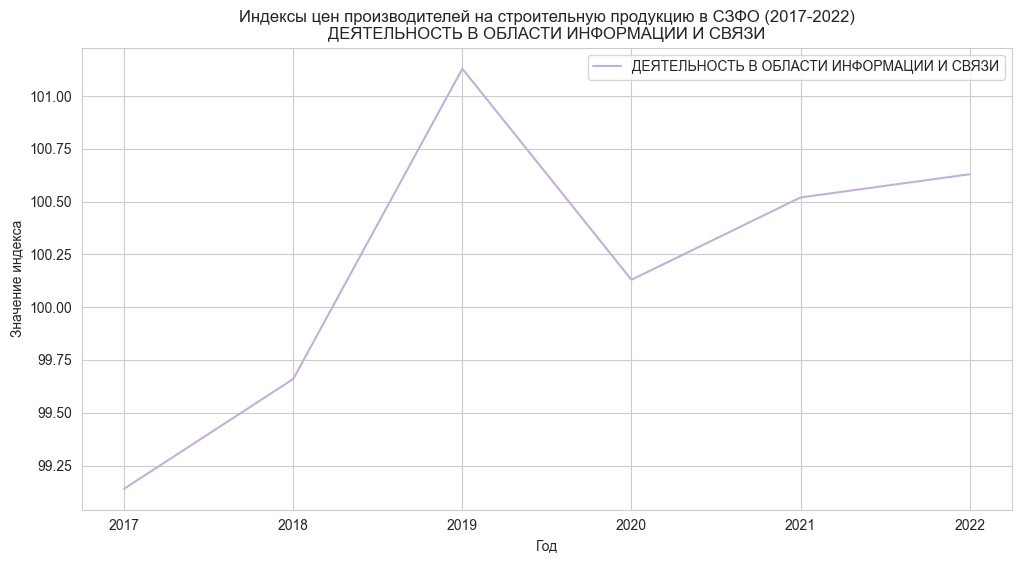

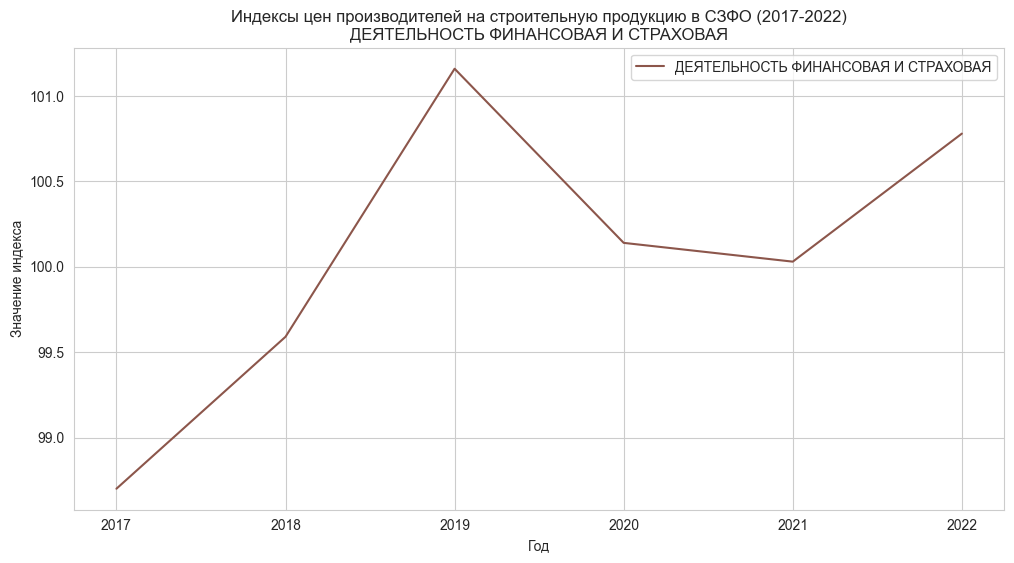

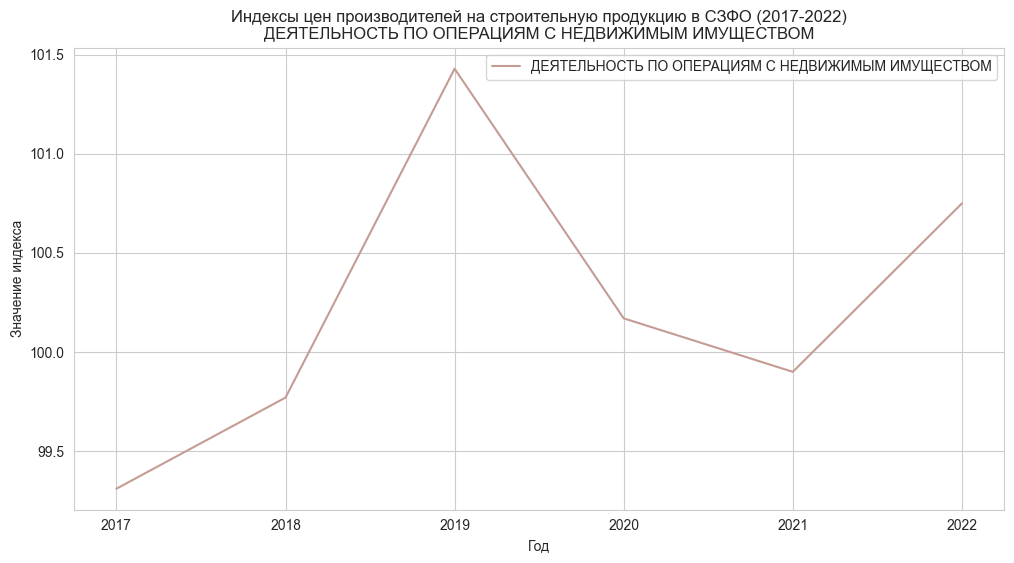

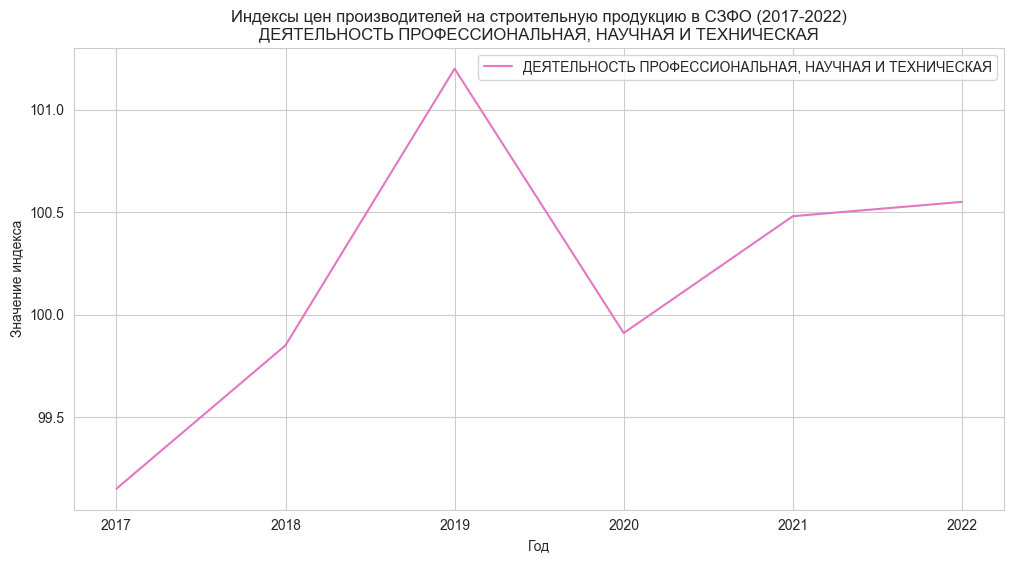

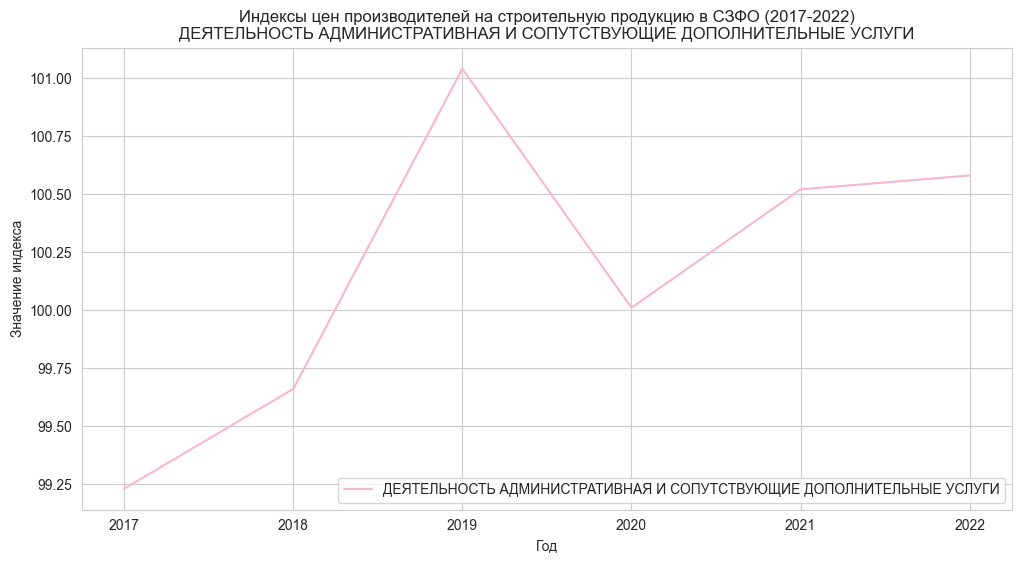

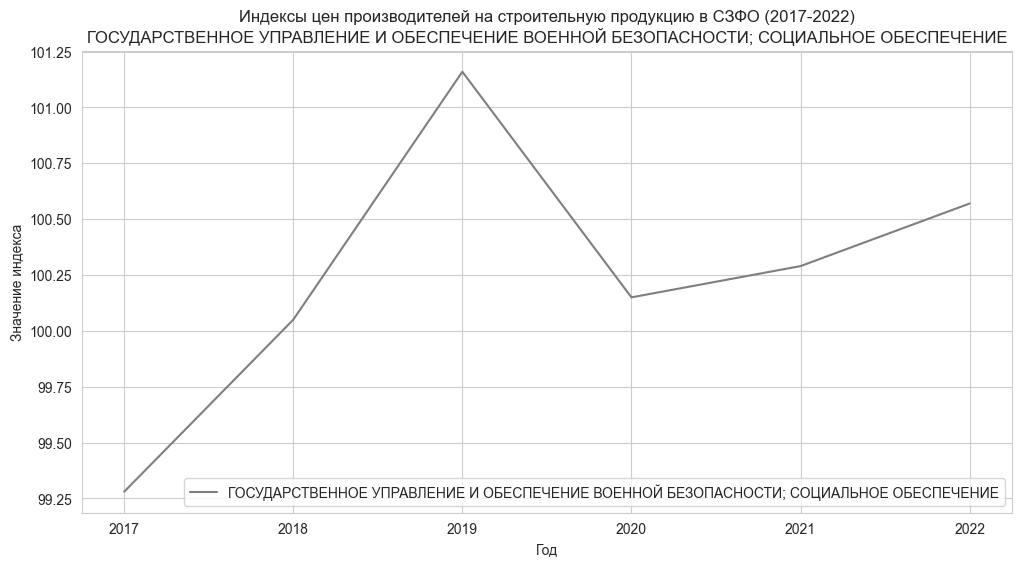

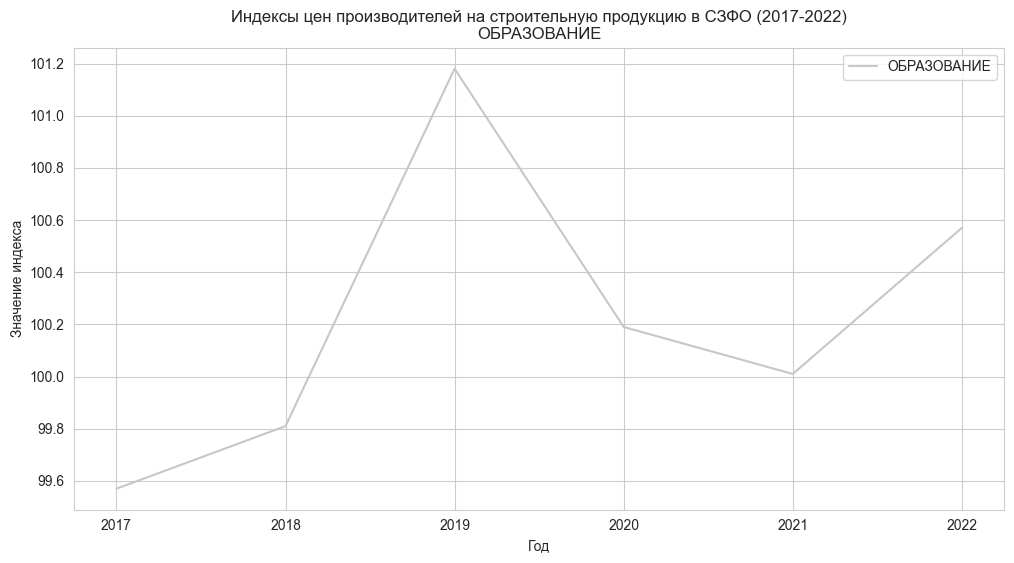

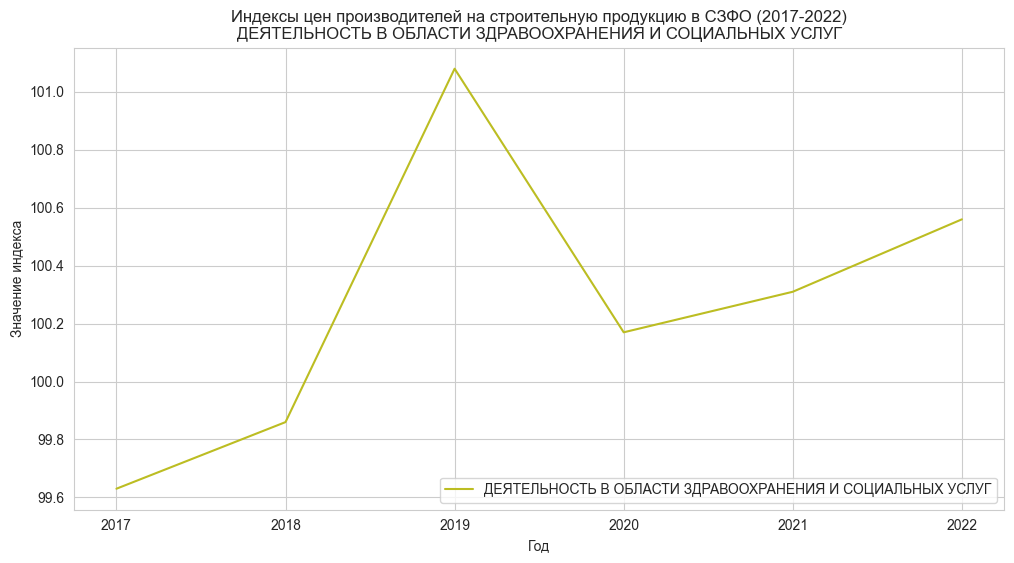

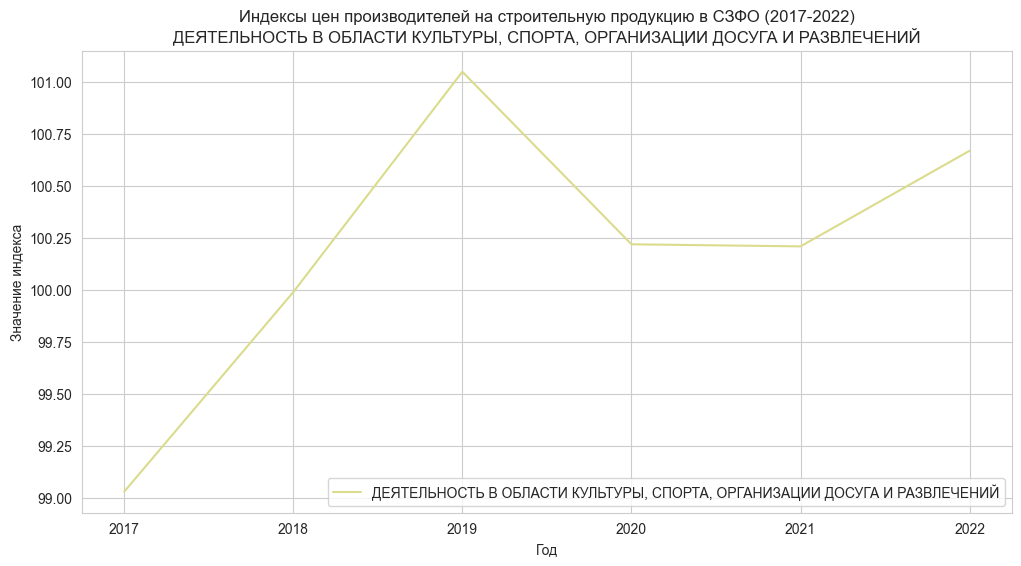

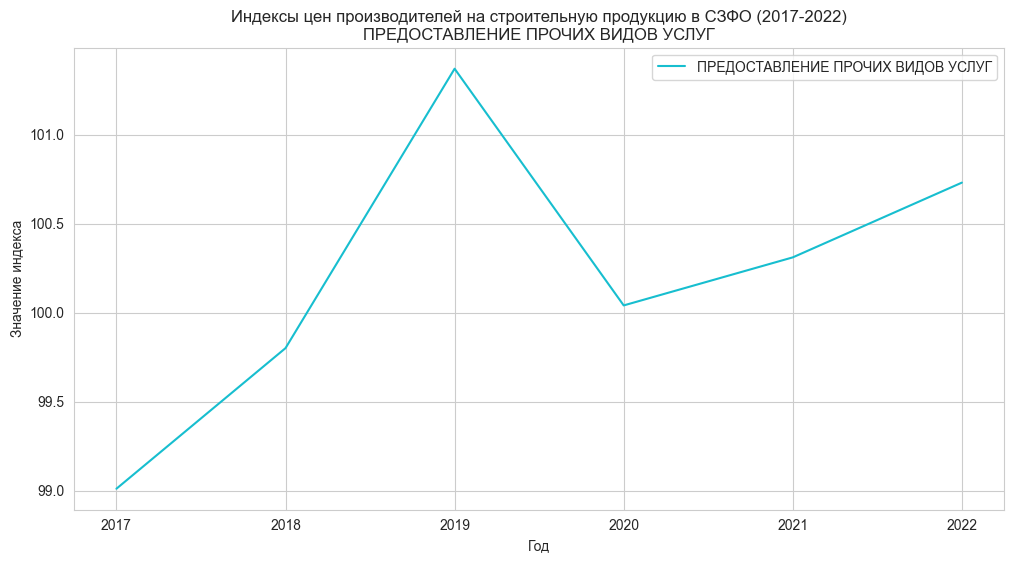

In [73]:
# Определяем цвета для каждого типа продукции
colors = plt.cm.tab20.colors

# Создаем папку для сохранения графиков
if not os.path.exists('C:\\Users\\HOME\\Documents\\data_science\\Profpoint\\plots'):
    os.makedirs('C:\\Users\\HOME\\Documents\\data_science\\Profpoint\\plots')

# Цикл по группам
for prod_type in prod_types:
    data = prod_index_aggr_gr[prod_index_aggr_gr['prod_type'] == prod_type][[2017, 2018, 2019, 2020, 2021, 2022]]
    fig, ax = plt.subplots(figsize=(12, 6))
    # Создаем линейную диаграмму
    sns.lineplot(x=data.columns, y=data.values[0], color=colors[prod_types.index(prod_type)], label=prod_type)
    # Добавляем легенду и подписи осей
    ax.legend()
    ax.set_xlabel('Год')
    ax.set_ylabel('Значение индекса')
    ax.set_title('Индексы цен производителей на строительную продукцию в СЗФО (2017-2022)\n' + prod_type)
    # Сохраняем график в файл
    plt.savefig(f'C:\\Users\\HOME\\Documents\\data_science\\Profpoint\\plots\\{prod_type}.jpg', bbox_inches='tight')
    plt.show();

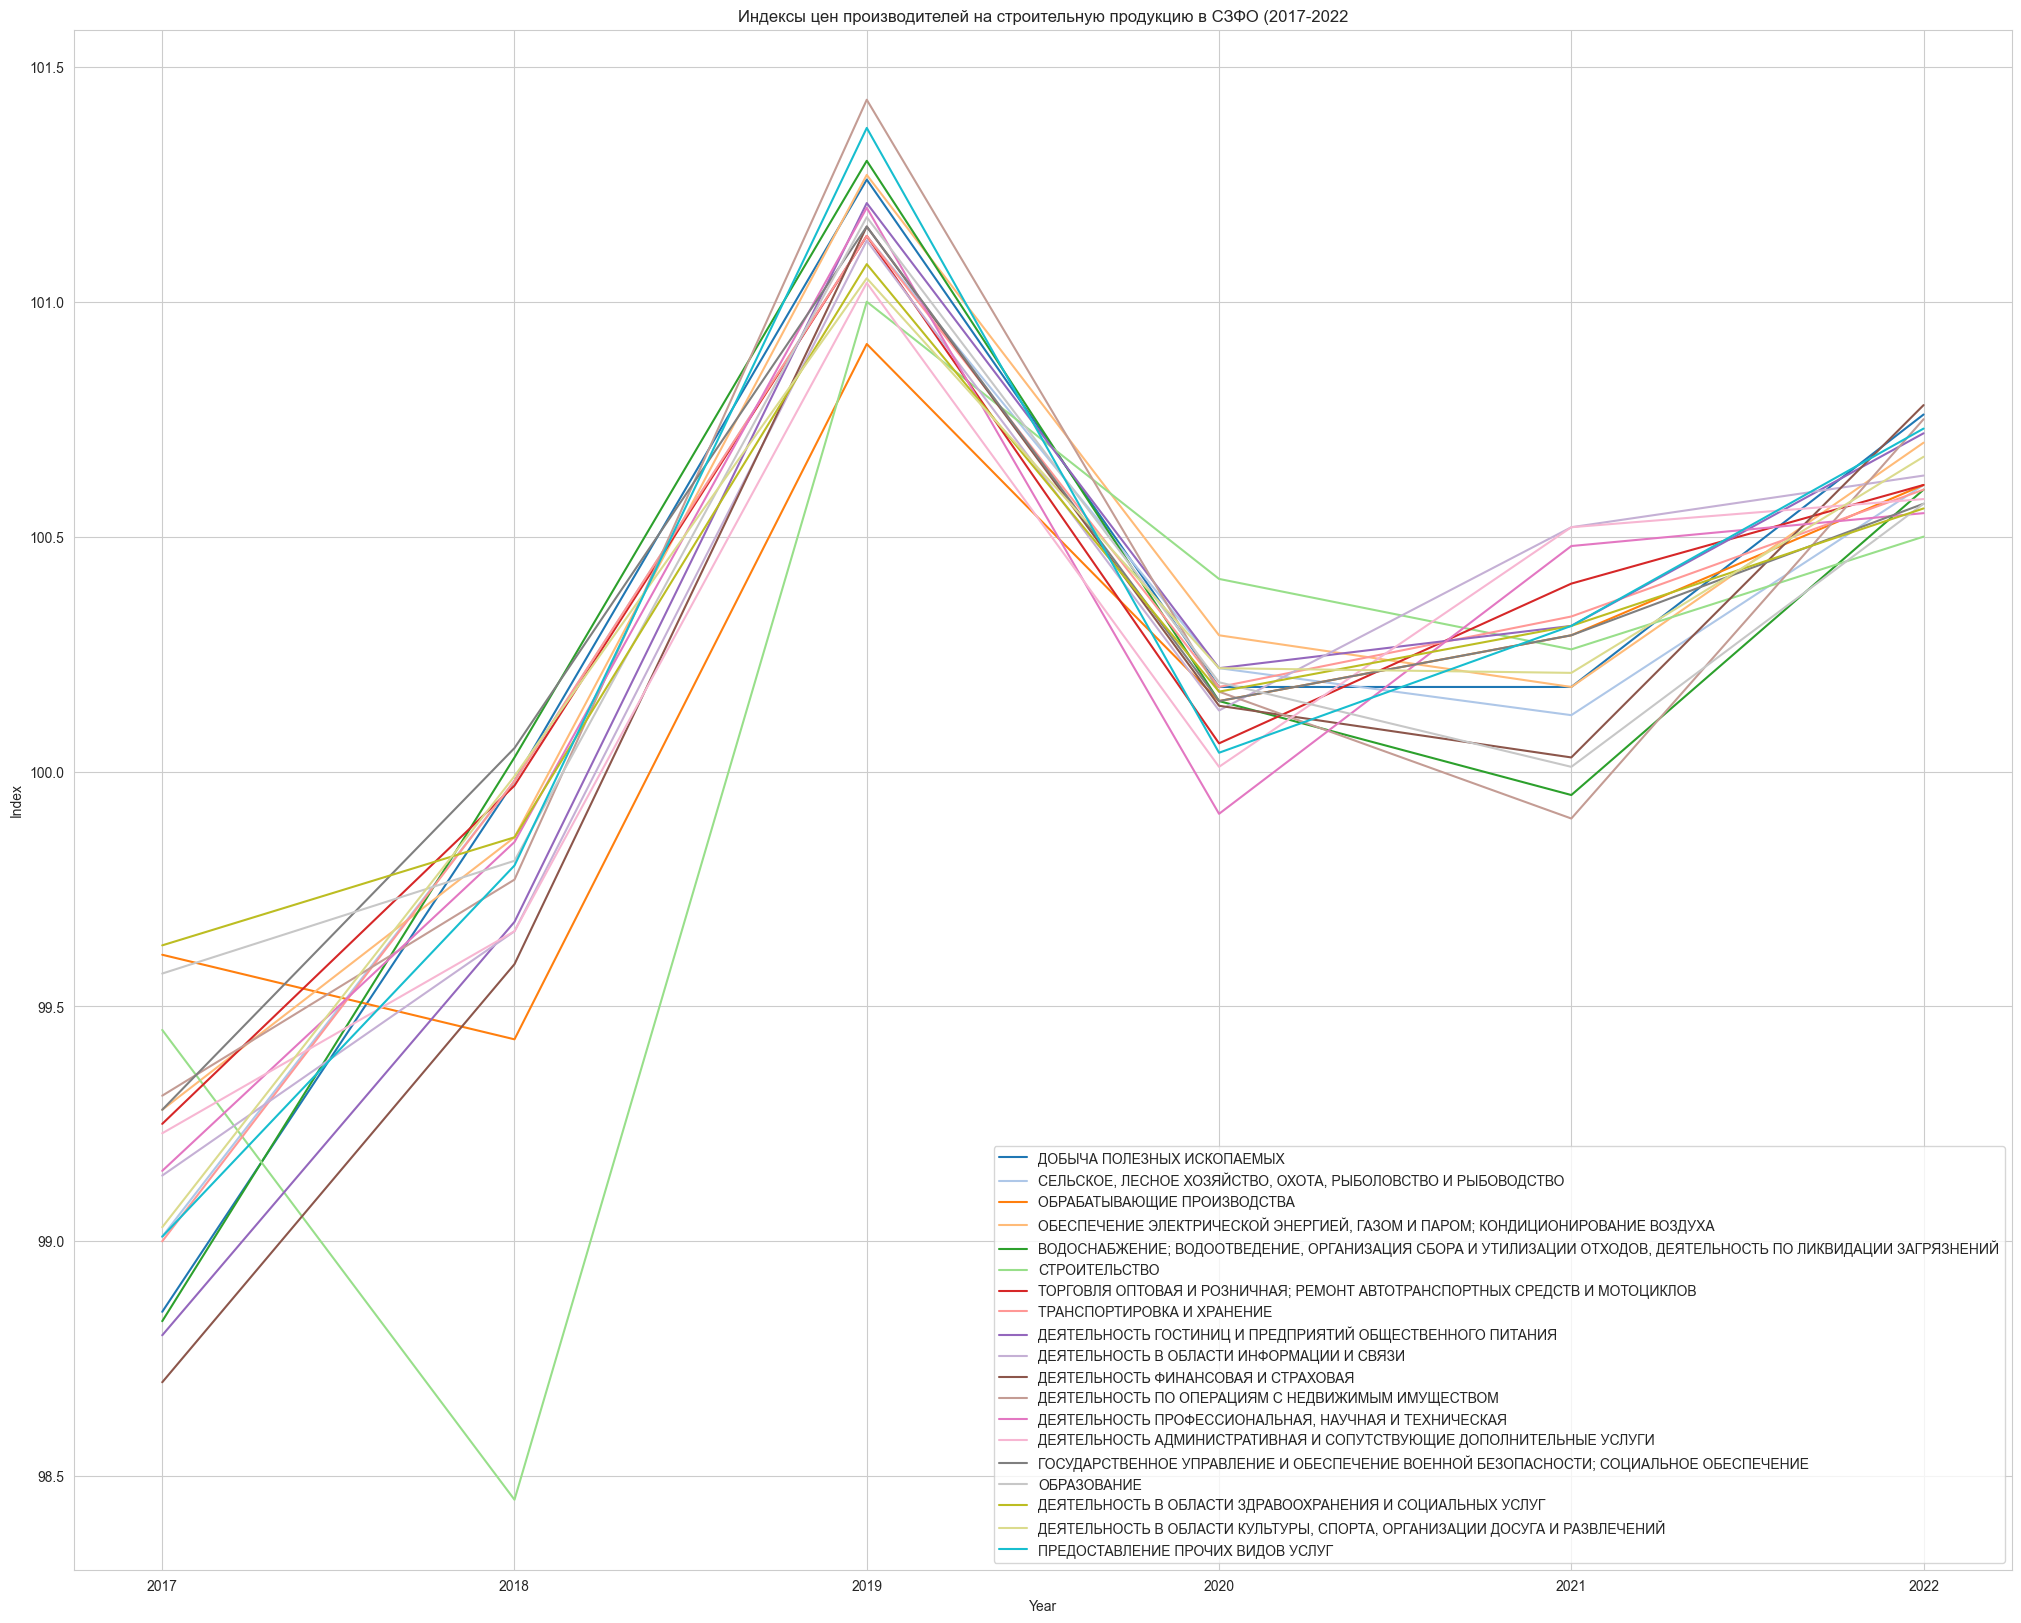

In [74]:
# Определяем цвета для каждого типа продукции
# colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'gray', 'brown', 'olive', 'pink', 'teal', 'navy', 'lime']

colors = plt.cm.tab20.colors # список цветов

fig, ax = plt.subplots(figsize=(25, 20))  # увеличиваем ширину фигуры

# цикл по группам
for i, prod_type in enumerate(prod_types):
    data = prod_index_aggr_gr[prod_index_aggr_gr['prod_type'] == prod_type][[2017, 2018, 2019, 2020, 2021, 2022]]
    # Создаем линейную диаграмму
    sns.lineplot(x=data.columns, y=data.values[0], color=colors[i], label=prod_type, ax=ax)

# Добавляем легенду и подписи осей
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Index')
ax.set_title('Индексы цен производителей на строительную продукцию в СЗФО (2017-2022')
# Save the figure to file
plt.savefig(r'C:\Users\HOME\Documents\data_science\Profpoint\plots\prod_index_aggr.jpg', bbox_inches='tight', dpi=300)
plt.show();

### Численность населения в субъектах России

In [77]:
population_rf = pd.read_excel("C:\\Users\\HOME\\PycharmProjects\\DA_ConstructionMarketplaces\\processed_data\\population_rf.xls")
population_rf

,region,population
0,Республика Карелия,532384
1,Республика Коми,734363
2,Ненецкий автономный округ,41426
3,Архангельская область,974604
4,Вологодская область,1138424
5,Калининградская область,1030979
6,Ленинградская область,2006022
7,Мурманская область,665240
8,Новгородская область,581578
9,Псковская область,596899


### Валовый региональный продукт

In [78]:
# валовый региональный продукт
vrp_2014_2022 = pd.read_excel("C:\\Users\\HOME\\PycharmProjects\\DA_ConstructionMarketplaces\\processed_data\\vrp_2017_2020.xls")
vrp_2014_2022.columns

Index(['region', 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='object')

In [79]:
vrp_2014_2022.isna().sum()

region    0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
2022      0
dtype: int64

In [80]:
vrp_2014_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   region  11 non-null     object 
 1   2014    11 non-null     float64
 2   2015    11 non-null     float64
 3   2016    11 non-null     float64
 4   2017    11 non-null     float64
 5   2018    11 non-null     float64
 6   2019    11 non-null     float64
 7   2020    11 non-null     float64
 8   2021    11 non-null     float64
 9   2022    11 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1008.0+ bytes


In [81]:
vrp_2014_2022.columns

Index(['region', 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='object')

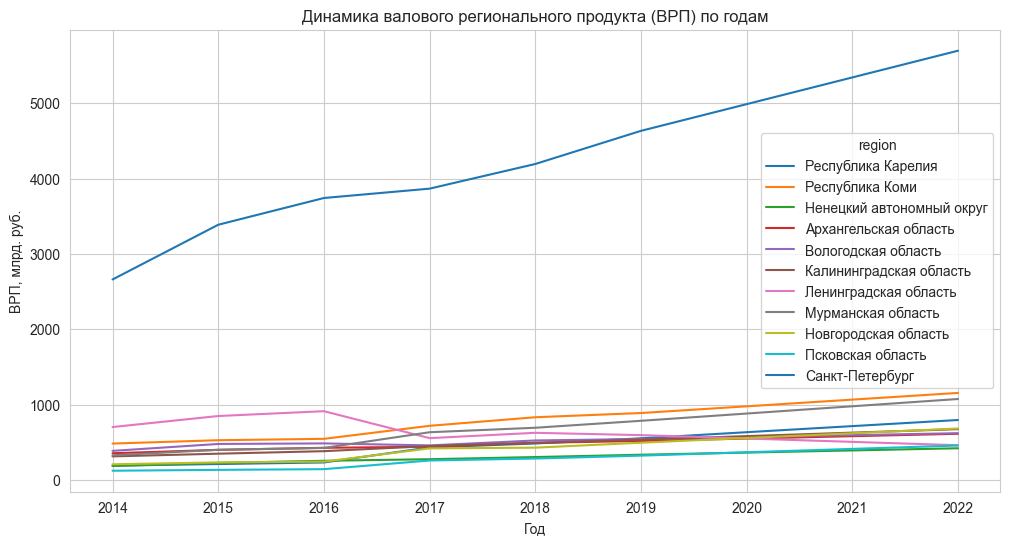

In [82]:
vrp = vrp_2014_2022.copy()
# установить 'region' в качестве индекса
vrp.set_index('region', inplace=True)

# построить динамику ВРП по годам
vrp.T.plot(figsize=(12,6), grid=True)

# установить заголовок и названия осей
plt.title('Динамика валового регионального продукта (ВРП) по годам')
plt.xlabel('Год')
plt.ylabel('ВРП, млрд. руб.')
plt.savefig(r'C:\Users\HOME\Documents\data_science\Profpoint\plots\vrp.jpg', bbox_inches='tight', dpi=300)
plt.show()

In [83]:
vrp_2014_2022.isna().sum()

region    0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
2022      0
dtype: int64

### Индексы цен на первичном рынке жилья 2017-2022

In [84]:
# Индексы цен на первичном рынке жилья_2017_2022
constr_2017_2022 = pd.read_excel("C:\\Users\\HOME\\PycharmProjects\\DA_ConstructionMarketplaces\\processed_data\\constr_2017_2022.xls")
constr_2017_2022

,region,2017,2018,2019,2020,2021,2022
0,Республика Карелия,98.88,103.28,103.23,104.28,113.92,124.90
1,Республика Коми,95.42,94.58,113.94,109.26,124.38,127.05
2,Ненецкий автономный округ,NaN,97.56,NaN,NaN,0.00,100.28
3,Архангельская область,102.66,107.12,100.79,106.88,112.14,112.87
4,Вологодская область,99.85,102.23,104.02,112.39,119.37,131.38
5,Калининградская область,103.03,101.58,104.07,113.79,129.19,121.52
6,Ленинградская область,99.67,103.17,102.18,107.30,108.09,157.78
7,Мурманская область,NaN,NaN,NaN,NaN,0.00,0.00
8,Новгородская область,100.06,108.64,102.04,112.94,108.89,114.66
9,Псковская область,99.19,101.63,100.60,103.81,116.12,129.62


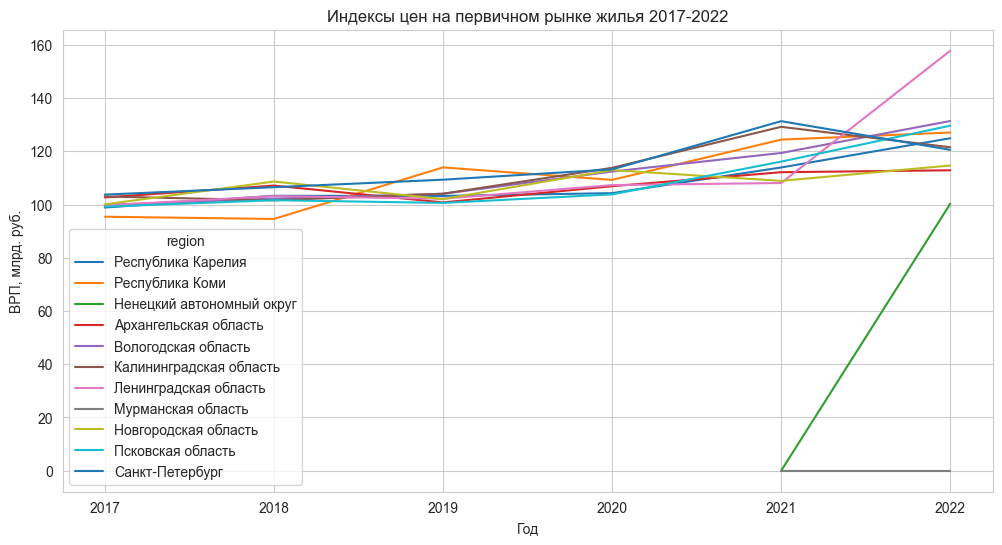

In [85]:
constr = constr_2017_2022.copy()
# установить 'region' в качестве индекса
constr.set_index('region', inplace=True)

# построить динамику ВРП по годам
constr.T.plot(figsize=(12,6), grid=True)

# установить заголовок и названия осей
plt.title('Индексы цен на первичном рынке жилья 2017-2022')
plt.xlabel('Год')
plt.ylabel('ВРП, млрд. руб.')
plt.savefig(r'C:\Users\HOME\Documents\data_science\Profpoint\plots\price_index.jpg', bbox_inches='tight', dpi=300)
plt.show();

In [86]:
constr_2017_2022.isna().sum()

region    0
2017      2
2018      1
2019      2
2020      2
2021      0
2022      0
dtype: int64

In [87]:
constr_2017_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   region  11 non-null     object 
 1   2017    9 non-null      float64
 2   2018    10 non-null     float64
 3   2019    9 non-null      float64
 4   2020    9 non-null      float64
 5   2021    11 non-null     float64
 6   2022    11 non-null     float64
dtypes: float64(6), object(1)
memory usage: 744.0+ bytes


In [88]:
# группируем по региону и заполняем пропущенные значения средним значением в каждой группе
constr_2017_2022 = constr_2017_2022.groupby('region').apply(lambda group: group.fillna(group.mean()))

# выводим результат
constr_2017_2022

,region,2017,2018,2019,2020,2021,2022
0,Республика Карелия,98.88,103.28,103.23,104.28,113.92,124.90
1,Республика Коми,95.42,94.58,113.94,109.26,124.38,127.05
2,Ненецкий автономный округ,NaN,97.56,NaN,NaN,0.00,100.28
3,Архангельская область,102.66,107.12,100.79,106.88,112.14,112.87
4,Вологодская область,99.85,102.23,104.02,112.39,119.37,131.38
5,Калининградская область,103.03,101.58,104.07,113.79,129.19,121.52
6,Ленинградская область,99.67,103.17,102.18,107.30,108.09,157.78
7,Мурманская область,NaN,NaN,NaN,NaN,0.00,0.00
8,Новгородская область,100.06,108.64,102.04,112.94,108.89,114.66
9,Псковская область,99.19,101.63,100.60,103.81,116.12,129.62


In [89]:
constr_2017_2022 = constr_2017_2022.dropna()
constr_2017_2022

,region,2017,2018,2019,2020,2021,2022
0,Республика Карелия,98.88,103.28,103.23,104.28,113.92,124.90
1,Республика Коми,95.42,94.58,113.94,109.26,124.38,127.05
3,Архангельская область,102.66,107.12,100.79,106.88,112.14,112.87
4,Вологодская область,99.85,102.23,104.02,112.39,119.37,131.38
5,Калининградская область,103.03,101.58,104.07,113.79,129.19,121.52
6,Ленинградская область,99.67,103.17,102.18,107.30,108.09,157.78
8,Новгородская область,100.06,108.64,102.04,112.94,108.89,114.66
9,Псковская область,99.19,101.63,100.60,103.81,116.12,129.62
10,Санкт-Петербург,103.72,106.51,109.33,113.20,131.32,120.55


### Индексы цен производителей на строительную продукцию 2017-2022

In [95]:
# Индексы цен производителей на строительную продукцию_2017_2022
materials_2017_2020 = pd.read_excel("C:\\Users\\HOME\\PycharmProjects\\DA_ConstructionMarketplaces\\processed_data\\materials_2017_2020.xls")
materials_2017_2020.head()

,region,material,2017,2018,2019,2020,2021,2022
0,Республика Карелия,ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,107.800000,97.235000,103.525000,102.910833,109.225000,102.591667
1,Республика Карелия,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПА...",108.502500,96.728333,103.703333,102.862500,103.415000,102.857500
2,Республика Карелия,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОР...",107.267500,96.363333,107.308333,103.512500,102.108333,102.932500
3,Республика Карелия,СТРОИТЕЛЬСТВО,106.630833,97.149167,104.095833,102.150000,107.349167,103.056667
4,Республика Карелия,ТОРГОВЛЯ ОПТОВАЯ И РОЗНИЧНАЯ; РЕМОНТ АВТОТРАНС...,106.794167,98.318333,103.135833,101.685833,105.340833,103.034167


In [96]:
pd.DataFrame(round(materials_2017_2020.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
region,0.000000
material,0.000000
2017,2.000000
2018,0.000000
2019,0.000000
2020,2.000000
2021,2.000000
2022,1.000000


In [97]:
# группируем по региону и заполняем пропущенные значения средним значением в каждой группе
materials_2017_2022 = materials_2017_2020.groupby('region').apply(lambda group: group.fillna(group.mean()))

# выводим результат
materials_2017_2022

,region,material,2017,2018,2019,2020,2021,2022
0,Республика Карелия,ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,107.800000,97.235000,103.525000,102.910833,109.225000,102.591667
1,Республика Карелия,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПА...",108.502500,96.728333,103.703333,102.862500,103.415000,102.857500
2,Республика Карелия,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОР...",107.267500,96.363333,107.308333,103.512500,102.108333,102.932500
3,Республика Карелия,СТРОИТЕЛЬСТВО,106.630833,97.149167,104.095833,102.150000,107.349167,103.056667
4,Республика Карелия,ТОРГОВЛЯ ОПТОВАЯ И РОЗНИЧНАЯ; РЕМОНТ АВТОТРАНС...,106.794167,98.318333,103.135833,101.685833,105.340833,103.034167
...,...,...,...,...,...,...,...,...
94,Санкт-Петербург,ТОРГОВЛЯ ОПТОВАЯ И РОЗНИЧНАЯ; РЕМОНТ АВТОТРАНС...,104.560833,108.213333,100.066667,103.609167,107.180000,102.985000
95,Санкт-Петербург,ТРАНСПОРТИРОВКА И ХРАНЕНИЕ,104.931667,108.396667,99.757500,104.100833,106.328333,103.058333
96,Санкт-Петербург,ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ИНФОРМАЦИИ И СВЯЗИ,105.115000,107.753333,100.425833,103.920000,106.890833,103.779167
97,Санкт-Петербург,ДЕЯТЕЛЬНОСТЬ ФИНАНСОВАЯ И СТРАХОВАЯ,105.262500,108.197500,100.944167,103.635000,106.482500,105.096667


In [98]:
materials_2017_2022.isna().sum()

region      0
material    0
2017        0
2018        0
2019        0
2020        0
2021        0
2022        0
dtype: int64

In [99]:
materials_2017_2022.columns

Index(['region', 'material', 2017, 2018, 2019, 2020, 2021, 2022], dtype='object')

In [100]:
materials_2017_2022['material'].unique()

array(['ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА',
       'ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА',
       'ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ',
       'СТРОИТЕЛЬСТВО',
       'ТОРГОВЛЯ ОПТОВАЯ И РОЗНИЧНАЯ; РЕМОНТ АВТОТРАНСПОРТНЫХ СРЕДСТВ И МОТОЦИКЛОВ',
       'ТРАНСПОРТИРОВКА И ХРАНЕНИЕ',
       'ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ИНФОРМАЦИИ И СВЯЗИ',
       'ДЕЯТЕЛЬНОСТЬ ФИНАНСОВАЯ И СТРАХОВАЯ',
       'ДЕЯТЕЛЬНОСТЬ ПО ОПЕРАЦИЯМ С НЕДВИЖИМЫМ ИМУЩЕСТВОМ'], dtype=object)

In [101]:
# Группировка по региону и материалу
grouped = materials_2017_2022.groupby(['region', 'material'])

# Рассчет статистик по годам для каждой группы
stats = grouped[[2017, 2018, 2019, 2020, 2021, 2022]].describe()

# Вывод результатов
stats

2017  \
                                                                         count   
region                material                                                   
Архангельская область ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА...   1.0   
                      ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ИНФОРМАЦИИ И СВЯЗИ            1.0   
                      ДЕЯТЕЛЬНОСТЬ ПО ОПЕРАЦИЯМ С НЕДВИЖИМЫМ ИМУЩЕСТВОМ    1.0   
                      ДЕЯТЕЛЬНОСТЬ ФИНАНСОВАЯ И СТРАХОВАЯ                  1.0   
                      ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАР...   1.0   
...                                                                        ...   
Санкт-Петербург       ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАР...   1.0   
                      ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА                          1.0   
                      СТРОИТЕЛЬСТВО                                        1.0   
                      ТОРГОВЛЯ ОПТОВАЯ И РОЗНИЧНАЯ; РЕМОНТ АВТОТРАНСП...   1.0   
                      ТРАНСПОРТИРОВКА И ХРАНЕНИЕ                           1.0   

                                                                                      \
                                                                                mean   
region                material                                                         
Архангельская область ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА...   98.491667   
                      ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ИНФОРМАЦИИ И СВЯЗИ            98.444167   
                      ДЕЯТЕЛЬНОСТЬ ПО ОПЕРАЦИЯМ С НЕДВИЖИМЫМ ИМУЩЕСТВОМ    98.774167   
                      ДЕЯТЕЛЬНОСТЬ ФИНАНСОВАЯ И СТРАХОВАЯ                  98.531667   
                      ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАР...   98.652500   
...                                                                              ...   
Санкт-Петербург       ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАР...  105.205000   
                      ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА                         105.094167   
                      СТРОИТЕЛЬСТВО                                       107.270833   
                      ТОРГОВЛЯ ОПТОВАЯ И РОЗНИЧНАЯ; РЕМОНТ АВТОТРАНСП...  104.560833   
                      ТРАНСПОРТИРОВКА И ХРАНЕНИЕ                          104.931667   

                                                                              \
                                                                         std   
region                material                                                 
Архангельская область ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА... NaN   
                      ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ИНФОРМАЦИИ И СВЯЗИ          NaN   
                      ДЕЯТЕЛЬНОСТЬ ПО ОПЕРАЦИЯМ С НЕДВИЖИМЫМ ИМУЩЕСТВОМ  NaN   
                      ДЕЯТЕЛЬНОСТЬ ФИНАНСОВАЯ И СТРАХОВАЯ                NaN   
                      ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАР... NaN   
...                                                                       ..   
Санкт-Петербург       ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАР... NaN   
                      ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА                        NaN   
                      СТРОИТЕЛЬСТВО                                      NaN   
                      ТОРГОВЛЯ ОПТОВАЯ И РОЗНИЧНАЯ; РЕМОНТ АВТОТРАНСП... NaN   
                      ТРАНСПОРТИРОВКА И ХРАНЕНИЕ                         NaN   

                                                                                      \
                                                                                 min   
region                material                                                         
Архангельская область ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА...   98.491667   
                      ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ИНФОРМАЦИИ И СВЯЗИ            98.444167   
                      ДЕЯТЕЛЬНОСТЬ ПО ОПЕРАЦИЯМ С НЕДВИЖИМЫМ ИМУЩЕСТВОМ    98.774167   
                      ДЕЯТЕЛЬНОСТЬ ФИНАНСОВ

In [102]:
# Define list of materials
materials_list = [
    'ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА',
    'ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА',
    'ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ',
    'СТРОИТЕЛЬСТВО',
    'ТОРГОВЛЯ ОПТОВАЯ И РОЗНИЧНАЯ; РЕМОНТ АВТОТРАНСПОРТНЫХ СРЕДСТВ И МОТОЦИКЛОВ',
    'ТРАНСПОРТИРОВКА И ХРАНЕНИЕ',
    'ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ИНФОРМАЦИИ И СВЯЗИ',
    'ДЕЯТЕЛЬНОСТЬ ФИНАНСОВАЯ И СТРАХОВАЯ',
    'ДЕЯТЕЛЬНОСТЬ ПО ОПЕРАЦИЯМ С НЕДВИЖИМЫМ ИМУЩЕСТВОМ'
]

# Calculate mean values for each year and material in each region
materials_2017_2022_aver = materials_2017_2022.groupby(['region', 'material'])[2017, 2018, 2019, 2020, 2021, 2022].mean().reset_index()

# Filter dataframe to only include materials in materials_list
materials_2017_2022_aver = materials_2017_2022_aver[materials_2017_2022_aver['material'].isin(materials_list)]

# Display resulting dataframe
materials_2017_2022_aver

,region,material,2017,2018,2019,2020,2021,2022
0,Архангельская область,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОР...",98.491667,100.428333,105.778333,101.850000,105.355000,105.618333
1,Архангельская область,ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ИНФОРМАЦИИ И СВЯЗИ,98.444167,100.114167,105.756667,102.875833,106.889167,102.910833
2,Архангельская область,ДЕЯТЕЛЬНОСТЬ ПО ОПЕРАЦИЯМ С НЕДВИЖИМЫМ ИМУЩЕСТВОМ,98.774167,100.173333,106.166667,102.161667,105.689167,103.870833
3,Архангельская область,ДЕЯТЕЛЬНОСТЬ ФИНАНСОВАЯ И СТРАХОВАЯ,98.531667,100.095833,105.761667,102.166667,105.638333,104.439167
4,Архангельская область,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПА...",98.652500,100.295000,105.161667,102.645833,106.220833,104.734167
...,...,...,...,...,...,...,...,...
94,Санкт-Петербург,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПА...",105.205000,108.364167,100.272500,103.670833,106.376667,103.731667
95,Санкт-Петербург,ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,105.094167,108.138333,100.634167,103.888333,106.245833,103.321667
96,Санкт-Петербург,СТРОИТЕЛЬСТВО,107.270833,99.100833,101.303333,102.421667,104.935833,103.180000
97,Санкт-Петербург,ТОРГОВЛЯ ОПТОВАЯ И РОЗНИЧНАЯ; РЕМОНТ АВТОТРАНС...,104.560833,108.213333,100.066667,103.609167,107.180000,102.985000


In [103]:
# группируем по региону и заполняем пропущенные значения средним значением в каждой группе
materials_2017_2022_aver_gr = materials_2017_2022_aver.groupby('region').apply(lambda group: group.fillna(group.mean()))

# выводим результат
materials_2017_2022_aver_gr.head(50)

,region,material,2017,2018,2019,2020,2021,2022
0,Архангельская область,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОР...",98.491667,100.428333,105.778333,101.850000,105.355000,105.618333
1,Архангельская область,ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ИНФОРМАЦИИ И СВЯЗИ,98.444167,100.114167,105.756667,102.875833,106.889167,102.910833
2,Архангельская область,ДЕЯТЕЛЬНОСТЬ ПО ОПЕРАЦИЯМ С НЕДВИЖИМЫМ ИМУЩЕСТВОМ,98.774167,100.173333,106.166667,102.161667,105.689167,103.870833
3,Архангельская область,ДЕЯТЕЛЬНОСТЬ ФИНАНСОВАЯ И СТРАХОВАЯ,98.531667,100.095833,105.761667,102.166667,105.638333,104.439167
4,Архангельская область,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПА...",98.652500,100.295000,105.161667,102.645833,106.220833,104.734167
5,Архангельская область,ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,98.625000,100.242500,104.396667,102.341667,106.987500,104.416667
6,Архангельская область,СТРОИТЕЛЬСТВО,98.971667,100.500833,104.468333,101.820833,106.734167,102.506667
7,Архангельская область,ТОРГОВЛЯ ОПТОВАЯ И РОЗНИЧНАЯ; РЕМОНТ АВТОТРАНС...,98.854167,100.315000,105.204167,101.794167,105.975833,102.725000
8,Архангельская область,ТРАНСПОРТИРОВКА И ХРАНЕНИЕ,99.062500,100.450833,104.675000,102.454167,106.783333,103.804167
9,Вологодская область,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОР...",103.733333,103.530833,106.387500,103.567500,100.791667,103.422500


In [104]:
mater = materials_2017_2022_aver_gr.copy()
mater = mater[['region', 2017, 2018, 2019, 2020, 2021, 2022]]
mater

,region,2017,2018,2019,2020,2021,2022
0,Архангельская область,98.491667,100.428333,105.778333,101.850000,105.355000,105.618333
1,Архангельская область,98.444167,100.114167,105.756667,102.875833,106.889167,102.910833
2,Архангельская область,98.774167,100.173333,106.166667,102.161667,105.689167,103.870833
3,Архангельская область,98.531667,100.095833,105.761667,102.166667,105.638333,104.439167
4,Архангельская область,98.652500,100.295000,105.161667,102.645833,106.220833,104.734167
...,...,...,...,...,...,...,...
94,Санкт-Петербург,105.205000,108.364167,100.272500,103.670833,106.376667,103.731667
95,Санкт-Петербург,105.094167,108.138333,100.634167,103.888333,106.245833,103.321667
96,Санкт-Петербург,107.270833,99.100833,101.303333,102.421667,104.935833,103.180000
97,Санкт-Петербург,104.560833,108.213333,100.066667,103.609167,107.180000,102.985000


In [105]:
# группируем по региону и заполняем пропущенные значения средним значением в каждой группе
materials = mater.groupby('region').apply(lambda group: group.fillna(group.mean()))
materials

,region,2017,2018,2019,2020,2021,2022
0,Архангельская область,98.491667,100.428333,105.778333,101.850000,105.355000,105.618333
1,Архангельская область,98.444167,100.114167,105.756667,102.875833,106.889167,102.910833
2,Архангельская область,98.774167,100.173333,106.166667,102.161667,105.689167,103.870833
3,Архангельская область,98.531667,100.095833,105.761667,102.166667,105.638333,104.439167
4,Архангельская область,98.652500,100.295000,105.161667,102.645833,106.220833,104.734167
...,...,...,...,...,...,...,...
94,Санкт-Петербург,105.205000,108.364167,100.272500,103.670833,106.376667,103.731667
95,Санкт-Петербург,105.094167,108.138333,100.634167,103.888333,106.245833,103.321667
96,Санкт-Петербург,107.270833,99.100833,101.303333,102.421667,104.935833,103.180000
97,Санкт-Петербург,104.560833,108.213333,100.066667,103.609167,107.180000,102.985000


In [106]:
# # Reset the index to make 'region' a column
# mater = mater.reset_index()

# # Group by region and sum values for each year
# mater = mater.groupby('region')[[2017, 2018, 2019, 2020, 2021, 2022]].mean()
# mater

In [107]:
materials.to_csv("C:\\Users\\HOME\\PycharmProjects\\DA_ConstructionMarketplaces\\processed_data\\materials.csv", index=False, encoding='utf-8-sig')

### Общий строительный объем введенных зданий_СЗФО_2017_2022

In [109]:
# Общий строительный объем введенных зданий_СЗФО_2017_2022
constr_vol_2017_2022 = pd.read_excel("C:\\Users\\HOME\\PycharmProjects\\DA_ConstructionMarketplaces\\processed_data\\constr_vol_2017_2022.xls")
constr_vol_2017_2022.head()

,region,2017,2018,2019,2020
0,Республика Карелия,1502.0,1362.2,1434.9,1523.3
1,Республика Коми,1552.5,2169.9,2558.5,1688.7
2,Ненецкий автономный округ,290.2,88.8,56.8,245.7
3,Вологодская область,3530.4,3619.7,3928.3,3626.9
4,Калининградская область,5613.4,6847.2,6624.3,8738.4


In [110]:
pd.DataFrame(round(constr_vol_2017_2022.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
region,0.000000
2017,0.000000
2018,0.000000
2019,0.000000
2020,0.000000


In [111]:
# Оценка направлений деятельности строительной организации_СЗФО_2017_2022
act_dir_2017_2022 = pd.read_excel("C:\\Users\\HOME\\PycharmProjects\\DA_ConstructionMarketplaces\\processed_data\\act_dir_2017_2022.xls")
act_dir_2017_2022

,region,activity,2017,2018,2019,2020,2021,2022
0,Республика Карелия,Другое,17.300,7.6150,21.9825,19.957500,19.030000,13.7925
1,Республика Карелия,Капитальный ремонт зданий и сооружений,3.350,3.1200,NaN,2.866667,2.740000,4.0300
2,Республика Карелия,Новое строительство жилых зданий,36.370,34.8525,21.8650,15.695000,19.350000,14.3975
3,Республика Карелия,Новое строительство нежилых зданий,9.550,6.4650,2.5200,4.870000,NaN,2.7300
4,Республика Карелия,Новое строительство сооружений,23.930,23.7975,46.4750,44.340000,38.680000,38.4625
...,...,...,...,...,...,...,...,...
60,Санкт-Петербург,Капитальный ремонт зданий и сооружений,2.710,1.1125,0.8650,4.002500,0.723333,1.5900
61,Санкт-Петербург,Новое строительство жилых зданий,5.680,20.0625,11.2325,30.465000,7.320000,18.2875
62,Санкт-Петербург,Новое строительство нежилых зданий,11.875,21.5300,13.5100,3.785000,21.290000,9.2525
63,Санкт-Петербург,Новое строительство сооружений,9.935,1.5075,50.7950,24.390000,43.692500,43.9400


In [112]:
pd.DataFrame(round(act_dir_2017_2022.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
region,0.000000
activity,0.000000
2017,3.000000
2018,12.000000
2019,6.000000
2020,15.000000
2021,15.000000
2022,18.000000


### Оценка направлений деятельности строительной организации_СЗФО_2017_2022

In [113]:
# группируем по региону и заполняем пропущенные значения средним значением в каждой группе
act_dir_2017_2022 = act_dir_2017_2022.groupby(['region', 'activity']).apply(lambda group: group.fillna(group.mean()))

# выводим результат
act_dir_2017_2022

,region,activity,2017,2018,2019,2020,2021,2022
0,Республика Карелия,Другое,17.300,7.6150,21.9825,19.957500,19.030000,13.7925
1,Республика Карелия,Капитальный ремонт зданий и сооружений,3.350,3.1200,NaN,2.866667,2.740000,4.0300
2,Республика Карелия,Новое строительство жилых зданий,36.370,34.8525,21.8650,15.695000,19.350000,14.3975
3,Республика Карелия,Новое строительство нежилых зданий,9.550,6.4650,2.5200,4.870000,NaN,2.7300
4,Республика Карелия,Новое строительство сооружений,23.930,23.7975,46.4750,44.340000,38.680000,38.4625
...,...,...,...,...,...,...,...,...
60,Санкт-Петербург,Капитальный ремонт зданий и сооружений,2.710,1.1125,0.8650,4.002500,0.723333,1.5900
61,Санкт-Петербург,Новое строительство жилых зданий,5.680,20.0625,11.2325,30.465000,7.320000,18.2875
62,Санкт-Петербург,Новое строительство нежилых зданий,11.875,21.5300,13.5100,3.785000,21.290000,9.2525
63,Санкт-Петербург,Новое строительство сооружений,9.935,1.5075,50.7950,24.390000,43.692500,43.9400


In [114]:
act_dir_2017_2022.columns

Index(['region', 'activity', 2017, 2018, 2019, 2020, 2021, 2022], dtype='object')

In [115]:
# Group by region and activity and fill missing values with mean of each group
act_dir_2017_2022 = act_dir_2017_2022.groupby(['region', 'activity']).apply(lambda group: group.fillna(group.mean()))

# Pivot the table and select desired columns
act_dir_2017_2022_gr = act_dir_2017_2022.pivot_table(index='region', values=[2017, 2018, 2019, 2020, 2021, 2022])

# Reset the index
act_dir_2017_2022_gr = act_dir_2017_2022_gr.reset_index()

# Rename the columns
act_dir_2017_2022_gr.columns = ['region', '2017', '2018', '2019', '2020', '2021', '2022']
act_dir_2017_2022_gr

,region,2017,2018,2019,2020,2021,2022
0,Архангельская область,16.666667,NaN,16.666667,NaN,NaN,NaN
1,Вологодская область,16.666667,16.667083,16.666250,16.667083,16.666250,16.511250
2,Калининградская область,16.670000,16.665833,16.666250,16.666667,16.666667,15.974583
3,Ленинградская область,16.666667,16.667500,16.665833,16.666250,16.666667,16.262083
4,Мурманская область,16.911667,16.667500,16.665833,19.999500,20.000500,24.594375
5,Ненецкий автономный округ,33.333333,33.333333,50.000000,52.887500,35.060833,72.815000
6,Новгородская область,16.666667,16.666667,16.666667,16.665833,16.666667,16.666667
7,Псковская область,16.667500,16.666667,16.666667,16.667083,16.666250,16.303750
8,Республика Карелия,16.666667,16.926667,20.252500,17.192361,20.000500,14.938333
9,Республика Коми,16.667500,16.665000,16.666667,16.666250,16.666667,15.812500


### Индекс потребительских цен

In [116]:
cpi_2017_2022 = pd.read_excel("C:\\Users\\HOME\\PycharmProjects\\DA_ConstructionMarketplaces\\processed_data\\cpi_2017_2022.xlsx")
cpi_2017_2022

Лист1


,region,2017,2018,2019,2020,2021,2022
0,Республика Карелия,102.79,104.30,102.78,106.06,109.36,111.76
1,Республика Коми,102.35,105.10,103.04,106.63,107.45,111.39
2,Ненецкий автономный округ,101.67,101.84,104.12,103.42,103.67,115.63
3,Архангельская область,101.53,103.95,103.13,104.73,109.57,111.87
4,Вологодская область,102.20,103.90,102.93,105.28,109.31,112.58
5,Калининградская область,102.81,104.82,102.76,105.14,109.49,112.92
6,Ленинградская область,102.70,103.98,102.86,104.06,107.96,110.83
7,Мурманская область,103.11,104.43,103.48,104.09,107.17,115.27
8,Новгородская область,102.40,104.92,102.54,105.57,107.42,111.12
9,Псковская область,102.44,104.86,102.34,104.91,108.06,112.04


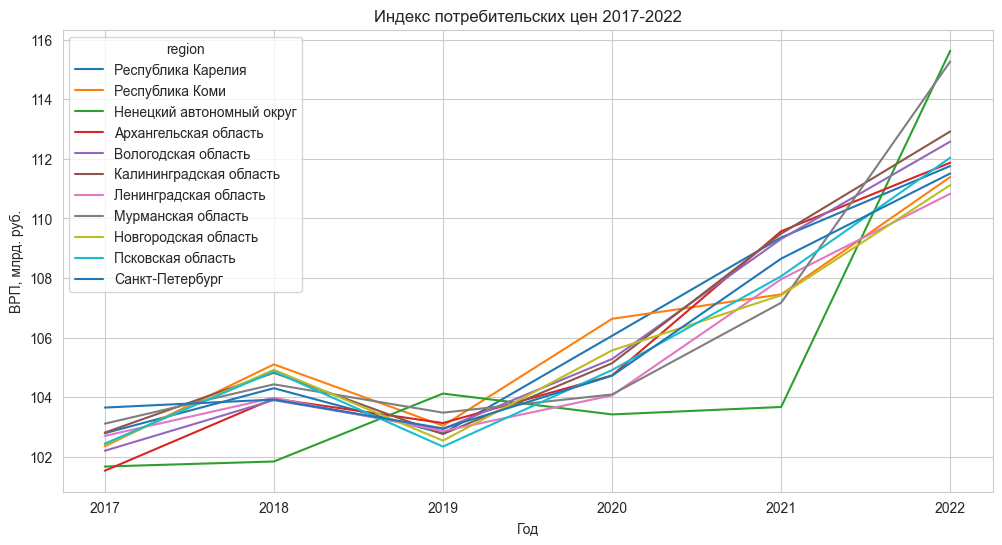

In [117]:
cpi = cpi_2017_2022.copy()
# установить 'region' в качестве индекса
cpi.set_index('region', inplace=True)

# построить динамику ВРП по годам
cpi.T.plot(figsize=(12,6), grid=True)

# установить заголовок и названия осей
plt.title('Индекс потребительских цен 2017-2022')
plt.xlabel('Год')
plt.ylabel('ВРП, млрд. руб.')
plt.savefig(r'C:\Users\HOME\Documents\data_science\Profpoint\plots\cpi_2017_2022.jpg', bbox_inches='tight', dpi=300)
plt.show();

In [118]:
prod_index_aggr_reg = pd.read_csv("C:\\Users\\HOME\\PycharmProjects\\DA_ConstructionMarketplaces\\processed_data\\prod_index_aggr_reg.csv")
# prod_index_aggr_reg = prod_index_aggr_reg.drop('Unnamed: 0', axis=1)
prod_index_aggr_reg

,region,2017,2018,2019,2020,2021,2022
0,Северо-Западный федеральный округ,99.01,99.98,101.14,100.22,100.12,100.61
1,Северо-Западный федеральный округ,98.85,99.98,101.26,100.18,100.18,100.76
2,Северо-Западный федеральный округ,99.61,99.43,100.91,100.15,100.29,100.61
3,Северо-Западный федеральный округ,99.28,99.86,101.27,100.29,100.18,100.70
4,Северо-Западный федеральный округ,98.83,100.03,101.30,100.15,99.95,100.60
...,...,...,...,...,...,...,...
221,Санкт-Петербург,100.31,100.31,100.67,99.70,100.75,100.70
222,Санкт-Петербург,100.26,99.70,100.53,99.77,100.24,100.75
223,Санкт-Петербург,99.99,100.18,100.86,99.75,100.88,100.72
224,Санкт-Петербург,99.85,100.16,100.62,99.67,100.80,100.73


In [119]:
materials

,region,2017,2018,2019,2020,2021,2022
0,Архангельская область,98.491667,100.428333,105.778333,101.850000,105.355000,105.618333
1,Архангельская область,98.444167,100.114167,105.756667,102.875833,106.889167,102.910833
2,Архангельская область,98.774167,100.173333,106.166667,102.161667,105.689167,103.870833
3,Архангельская область,98.531667,100.095833,105.761667,102.166667,105.638333,104.439167
4,Архангельская область,98.652500,100.295000,105.161667,102.645833,106.220833,104.734167
...,...,...,...,...,...,...,...
94,Санкт-Петербург,105.205000,108.364167,100.272500,103.670833,106.376667,103.731667
95,Санкт-Петербург,105.094167,108.138333,100.634167,103.888333,106.245833,103.321667
96,Санкт-Петербург,107.270833,99.100833,101.303333,102.421667,104.935833,103.180000
97,Санкт-Петербург,104.560833,108.213333,100.066667,103.609167,107.180000,102.985000


## Формирование панели данных и построение модели

Нужно использовать функцию pd.concat() для объединения таблиц вдоль оси времени (столбцов), а затем применить метод melt() для перевода таблицы в "длинный" формат (long format) и создания переменной year.

In [120]:
# преобразование данных в панель
vrp_2014_2022_panel = vrp_2014_2022.melt(id_vars=['region'], var_name='year', value_name='vrp')
cpi_2017_2022_panel = cpi_2017_2022.melt(id_vars=['region'], var_name='year', value_name='cpi')

prod_index_aggr_reg_panel = prod_index_aggr_reg.melt(id_vars=['region'], var_name='year', value_name='prod_index')

constr_2017_2022_panel = constr_2017_2022.melt(id_vars=['region'], var_name='year', value_name='constr')

materials_panel = materials.melt(id_vars=['region'], var_name='year', value_name='materials')

constr_vol_2017_2020_panel = constr_vol_2017_2022.melt(id_vars=['region'], var_name='year', value_name='constr_vol')

act_dir_2017_2022_gr_panel = act_dir_2017_2022_gr.melt(id_vars=['region'], var_name='year', value_name='act_dir')

In [121]:
# Fill missing values with the mean of each group
vrp_2014_2022_panel = vrp_2014_2022_panel.groupby(['region', 'year']).apply(lambda group: group.fillna(group.mean()))

cpi_2017_2022_panel = cpi_2017_2022_panel.groupby(['region', 'year']).apply(lambda group: group.fillna(group.mean()))

prod_index_aggr_reg_panel = prod_index_aggr_reg_panel.groupby(['region', 'year']).apply(lambda group: group.fillna(group.mean()))

constr_2017_2022_panel = constr_2017_2022_panel.groupby(['region', 'year']).apply(lambda group: group.fillna(group.mean()))

materials_panel = materials_panel.groupby(['region', 'year']).apply(lambda group: group.fillna(group.mean()))

constr_vol_2017_2020_panel = constr_vol_2017_2020_panel.groupby(['region', 'year']).apply(lambda group: group.fillna(group.mean()))

act_dir_2017_2022_gr_panel = act_dir_2017_2022_gr_panel.groupby(['region', 'year']).apply(lambda group: group.fillna(group.mean()))

# Drop remaining missing values
vrp_2014_2022_panel.dropna(inplace=True)
cpi_2017_2022_panel.dropna(inplace=True)
prod_index_aggr_reg_panel.dropna(inplace=True)
constr_2017_2022_panel.dropna(inplace=True)
materials_panel.dropna(inplace=True)
constr_vol_2017_2020_panel.dropna(inplace=True)
act_dir_2017_2022_gr_panel.dropna(inplace=True)

In [122]:
materials_panel['year'] = materials_panel['year'].astype(int)
materials_panel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 0 to 593
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     594 non-null    object 
 1   year       594 non-null    int32  
 2   materials  594 non-null    float64
dtypes: float64(1), int32(1), object(1)
memory usage: 32.4+ KB


In [123]:
vrp_2014_2022_panel['year'] = vrp_2014_2022_panel['year'].astype(int)
cpi_2017_2022_panel['year'] = cpi_2017_2022_panel['year'].astype(int)
prod_index_aggr_reg_panel['year'] = prod_index_aggr_reg_panel['year'].astype(int)
constr_2017_2022_panel['year'] = constr_2017_2022_panel['year'].astype(int)
materials_panel['year'] = materials_panel['year'].astype(int)
constr_vol_2017_2020_panel['year'] = constr_vol_2017_2020_panel['year'].astype(int)
act_dir_2017_2022_gr_panel['year'] = act_dir_2017_2022_gr_panel['year'].astype(int)

merged = constr_2017_2022_panel[['region', 'year', 'constr']]
merged = pd.merge(merged, vrp_2014_2022_panel[['region', 'year', 'vrp']], on=['region', 'year'], how='outer')
merged = pd.merge(merged, prod_index_aggr_reg_panel[['region', 'year', 'prod_index']], on=['region', 'year'], how='outer')
merged = pd.merge(merged, materials_panel[['region', 'year', 'materials']], on=['region', 'year'], how='outer')
merged = pd.merge(merged, act_dir_2017_2022_gr_panel[['region', 'year', 'act_dir']], on=['region', 'year'], how='outer')
merged = pd.merge(merged, cpi_2017_2022_panel[['region', 'year', 'cpi']], on=['region', 'year'], how='outer')

merged.to_csv("C:\\Users\\HOME\\PycharmProjects\\DA_ConstructionMarketplaces\\data_all.csv", index=False)

In [124]:
merged.head(50)

,region,year,constr,vrp,prod_index,materials,act_dir,cpi
0,Республика Карелия,2017,98.88,433.4339,NaN,107.267500,16.666667,102.79
1,Республика Карелия,2017,98.88,433.4339,NaN,107.474167,16.666667,102.79
2,Республика Карелия,2017,98.88,433.4339,NaN,103.312500,16.666667,102.79
3,Республика Карелия,2017,98.88,433.4339,NaN,105.715000,16.666667,102.79
4,Республика Карелия,2017,98.88,433.4339,NaN,108.502500,16.666667,102.79
5,Республика Карелия,2017,98.88,433.4339,NaN,107.800000,16.666667,102.79
6,Республика Карелия,2017,98.88,433.4339,NaN,106.630833,16.666667,102.79
7,Республика Карелия,2017,98.88,433.4339,NaN,106.794167,16.666667,102.79
8,Республика Карелия,2017,98.88,433.4339,NaN,108.735000,16.666667,102.79
9,Республика Коми,2017,95.42,719.5993,NaN,102.980000,16.667500,102.35


In [125]:
len(merged)

2841

In [126]:
merged.columns

Index(['region', 'year', 'constr', 'vrp', 'prod_index', 'materials', 'act_dir',
       'cpi'],
      dtype='object')

In [127]:
pd.DataFrame(round(merged.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
region,0.000000
year,0.000000
constr,49.000000
vrp,44.000000
prod_index,20.000000
materials,45.000000
act_dir,46.000000
cpi,45.000000


In [128]:
# группируем по региону и заполняем пропущенные значения средним значением в каждой группе
merged_av = merged.groupby(['region', 'year']).apply(lambda group: group.fillna(group.mean()))

# выводим результат
merged_av

,region,year,constr,vrp,prod_index,materials,act_dir,cpi
0,Республика Карелия,2017,98.88,433.4339,NaN,107.267500,16.666667,102.79
1,Республика Карелия,2017,98.88,433.4339,NaN,107.474167,16.666667,102.79
2,Республика Карелия,2017,98.88,433.4339,NaN,103.312500,16.666667,102.79
3,Республика Карелия,2017,98.88,433.4339,NaN,105.715000,16.666667,102.79
4,Республика Карелия,2017,98.88,433.4339,NaN,108.502500,16.666667,102.79
...,...,...,...,...,...,...,...,...
2836,Псковская область,2022,NaN,NaN,100.070000,NaN,NaN,NaN
2837,Псковская область,2022,NaN,NaN,100.180000,NaN,NaN,NaN
2838,Псковская область,2022,NaN,NaN,100.120000,NaN,NaN,NaN
2839,Псковская область,2022,NaN,NaN,100.180000,NaN,NaN,NaN


In [129]:
pd.DataFrame(round(merged_av.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
region,0.000000
year,0.000000
constr,49.000000
vrp,44.000000
prod_index,20.000000
materials,45.000000
act_dir,46.000000
cpi,45.000000


In [130]:
# data_clean = merged_av.drop(columns=['constr', 'materials'])

In [131]:
merged_av.describe()

,year,constr,vrp,prod_index,materials,act_dir,cpi
count,2841.000000,1458.000000,1599.000000,2268.000000,1566.000000,1530.000000,1566.000000
mean,2019.447730,112.854074,3280.878010,100.291865,104.024249,17.788092,105.881839
std,1.767517,10.275503,2084.996613,1.063019,2.614926,6.124033,3.309498
min,2014.000000,94.580000,123.800000,90.540000,96.363333,14.938333,101.530000
25%,2018.000000,104.070000,626.840000,99.960000,102.421667,16.665000,103.650000
50%,2019.000000,109.330000,4193.500000,100.420000,103.892500,16.666667,104.575000
75%,2021.000000,120.550000,4987.580000,100.746667,105.613333,16.666667,108.650000
max,2022.000000,157.780000,5696.300000,105.400000,111.720000,72.815000,115.630000


In [132]:
len(merged_av)

2841

In [133]:
pd.DataFrame(round(merged_av.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
region,0.000000
year,0.000000
constr,49.000000
vrp,44.000000
prod_index,20.000000
materials,45.000000
act_dir,46.000000
cpi,45.000000


In [134]:
data_final = merged_av.dropna()

In [135]:
data_final = data_final.drop_duplicates()
data_final.columns

Index(['region', 'year', 'constr', 'vrp', 'prod_index', 'materials', 'act_dir',
       'cpi'],
      dtype='object')

In [136]:
# ['region', 'year', 'vrp_2014_2022',
#      'population_rf', 'constr_2017_2022', 'materials_2017_2020',
#      'constr_vol_2017_2022',
#      'act_dir_2017_2022']

In [137]:
data_final.columns

Index(['region', 'year', 'constr', 'vrp', 'prod_index', 'materials', 'act_dir',
       'cpi'],
      dtype='object')

In [138]:
data_final

,region,year,constr,vrp,prod_index,materials,act_dir,cpi
72,Санкт-Петербург,2017,103.72,3866.4,99.82,104.675000,16.666667,103.65
73,Санкт-Петербург,2017,103.72,3866.4,99.82,105.115000,16.666667,103.65
74,Санкт-Петербург,2017,103.72,3866.4,99.82,105.215833,16.666667,103.65
75,Санкт-Петербург,2017,103.72,3866.4,99.82,105.262500,16.666667,103.65
76,Санкт-Петербург,2017,103.72,3866.4,99.82,105.205000,16.666667,103.65
...,...,...,...,...,...,...,...,...
1426,Санкт-Петербург,2022,120.55,5696.3,100.75,103.731667,16.368333,111.51
1427,Санкт-Петербург,2022,120.55,5696.3,100.75,103.321667,16.368333,111.51
1428,Санкт-Петербург,2022,120.55,5696.3,100.75,103.180000,16.368333,111.51
1429,Санкт-Петербург,2022,120.55,5696.3,100.75,102.985000,16.368333,111.51


In [139]:
d = data_final.drop(columns='year')

In [140]:
# группируем по региону и заполняем пропущенные значения средним значением в каждой группе
d_grouped = d .groupby('region').apply(lambda group: group.fillna(group.mean()))
d_grouped

,region,constr,vrp,prod_index,materials,act_dir,cpi
72,Санкт-Петербург,103.72,3866.4,99.82,104.675000,16.666667,103.65
73,Санкт-Петербург,103.72,3866.4,99.82,105.115000,16.666667,103.65
74,Санкт-Петербург,103.72,3866.4,99.82,105.215833,16.666667,103.65
75,Санкт-Петербург,103.72,3866.4,99.82,105.262500,16.666667,103.65
76,Санкт-Петербург,103.72,3866.4,99.82,105.205000,16.666667,103.65
...,...,...,...,...,...,...,...
1426,Санкт-Петербург,120.55,5696.3,100.75,103.731667,16.368333,111.51
1427,Санкт-Петербург,120.55,5696.3,100.75,103.321667,16.368333,111.51
1428,Санкт-Петербург,120.55,5696.3,100.75,103.180000,16.368333,111.51
1429,Санкт-Петербург,120.55,5696.3,100.75,102.985000,16.368333,111.51


In [141]:
d_merged = pd.merge(d_grouped, shops_by_region, on='region')
d_merged = pd.merge(d_merged, population_rf, on='region')
d_merged

,region,constr,vrp,prod_index,materials,act_dir,cpi,num_shops,population
0,Санкт-Петербург,103.72,3866.4,99.82,104.675000,16.666667,103.65,102,5607916
1,Санкт-Петербург,103.72,3866.4,99.82,105.115000,16.666667,103.65,102,5607916
2,Санкт-Петербург,103.72,3866.4,99.82,105.215833,16.666667,103.65,102,5607916
3,Санкт-Петербург,103.72,3866.4,99.82,105.262500,16.666667,103.65,102,5607916
4,Санкт-Петербург,103.72,3866.4,99.82,105.205000,16.666667,103.65,102,5607916
...,...,...,...,...,...,...,...,...,...
841,Санкт-Петербург,120.55,5696.3,100.75,103.731667,16.368333,111.51,102,5607916
842,Санкт-Петербург,120.55,5696.3,100.75,103.321667,16.368333,111.51,102,5607916
843,Санкт-Петербург,120.55,5696.3,100.75,103.180000,16.368333,111.51,102,5607916
844,Санкт-Петербург,120.55,5696.3,100.75,102.985000,16.368333,111.51,102,5607916


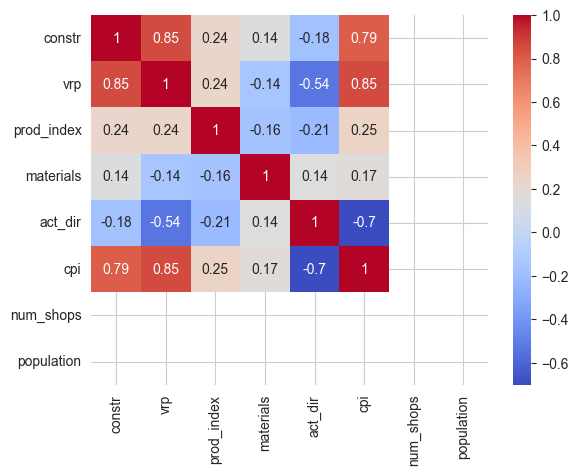

In [142]:
corr = d_merged.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)\

# save the plot as a file
plt.savefig("C:\\Users\\HOME\\Documents\\data_science\\Profpoint\\plots\\corr.jpg");

## Линейная регрессия с фиксированными эффектами

In [143]:
from linearmodels.panel import PanelOLS

In [145]:
# # Set 'region' and 'year' as index for the panel data
# data_final.set_index(['region', 'year'], inplace=True)
#
# # Create dependent and independent variables
# y = data_final['prod_index']
# X = data_final[['constr', 'vrp', 'materials', 'act_dir', 'cpi']]
#
# # Run fixed-effects regression with region and year fixed effects
# model = PanelOLS(y, X, entity_effects=True, time_effects=True)
# results = model.fit(cov_type='clustered', cluster_entity=True)
#
# # Print regression results summary
# print(results.summary)
#
# # Save regression results table to a file
# with open('regression_results.txt', 'w') as f:
#     f.write(results.summary.as_text())


In [147]:
# # Define the model
# model = PanelOLS.from_formula('prod_index ~ constr + vrp + materials + act_dir + cpi + EntityEffects + TimeEffects', data_final)
#
# # Fit the model
# results = model.fit()
#
# # View the coefficients
# print(results.summary)
#
# # Plot actual vs. predicted values
# predicted = results.predict()
# plt.scatter(data_final['prod_index'], predicted)
# plt.xlabel('Actual prod_index')
# plt.ylabel('Predicted prod_index')
# plt.savefig("C:\\Users\\HOME\\Documents\\data_science\\Profpoint\\plots\\fixed_effects.jpg")
# plt.show();

In [148]:
shops_by_region

,region,num_shops
10,Санкт-Петербург,102
7,Псковская область,99
2,Калининградская область,98
8,Республика Карелия,95
0,Архангельская область,92
9,Республика Коми,91
4,Мурманская область,83
6,Новгородская область,75
3,Ленинградская область,71
1,Вологодская область,70


In [149]:
vrp_2014_2022.columns

Index(['region', 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='object')

In [150]:
# Merge data
market_volume = pd.merge(shops_by_region, vrp_2014_2022[['region', 2022]], on='region')
market_volume.rename(columns={2022: 'vrp_2022'}, inplace=True)

# Calculate market volume
market_volume['market_volume'] = market_volume['vrp_2022'] / market_volume['num_shops']
# Round market volume to two decimal places
market_volume['market_volume'] = market_volume['market_volume'].round(2)
# Save data
market_volume.to_csv('market_volume.csv', index=False)

In [151]:
market_volume

,region,num_shops,vrp_2022,market_volume
0,Санкт-Петербург,102,5696.30000,55.85
1,Псковская область,99,458.18878,4.63
2,Калининградская область,98,675.12984,6.89
3,Республика Карелия,95,796.55696,8.38
4,Архангельская область,92,613.73642,6.67
5,Республика Коми,91,1156.07758,12.70
6,Мурманская область,83,1075.33164,12.96
7,Новгородская область,75,683.72668,9.12
8,Ленинградская область,71,462.06248,6.51
9,Вологодская область,70,621.59124,8.88


In [152]:
market_volume.columns

Index(['region', 'num_shops', 'vrp_2022', 'market_volume'], dtype='object')

In [154]:
market_volume.to_csv("C:\\Users\\HOME\\PycharmProjects\\DA_ConstructionMarketplaces\\market_volume.csv",
                     index=False, encoding='utf-8-sig')

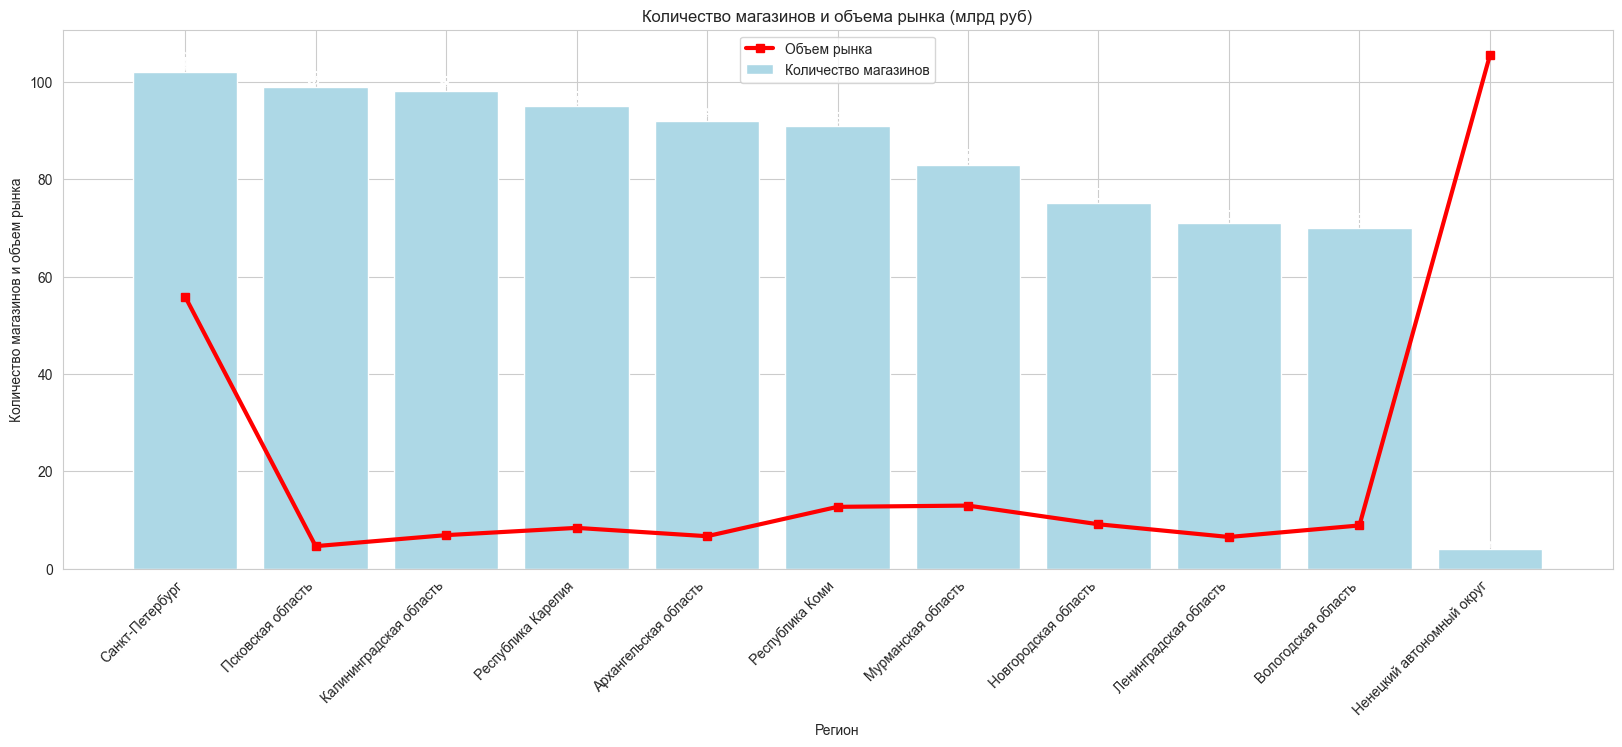

In [153]:
# Create plot
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(market_volume['region'], market_volume['num_shops'], label='Количество магазинов', color='lightblue')
# ax.plot(market_volume['region'], market_volume['vrp_2022'], label='ВРП', linewidth=2, color='gray', marker='o')
ax.plot(market_volume['region'], market_volume['market_volume'], label='Объем рынка', linewidth=3, color='red', marker='s')
plt.xticks(market_volume['region'], rotation=45, ha='right')
plt.xlabel('Регион')
plt.ylabel('Количество магазинов и объем рынка')
plt.legend()

# Set axis labels and title
ax.set_xlabel('Регион')
ax.set_title('Количество магазинов и объема рынка (млрд руб)')

# Add legend
ax.legend()

# Add labels to the bars
for i, v in enumerate(market_volume['num_shops']):
    ax.bar_label(ax.containers[0], labels=[v], label_type='edge', fontsize=10, padding=2, rotation=90, color='white')
plt.savefig(r'C:\Users\HOME\Documents\data_science\Profpoint\plots\market_volume.jpg', bbox_inches='tight', dpi=300)
# Show plot
plt.show();